### Установка

In [8]:
!git clone https://github.com/uivvyd/Diffusion-samplers-for-TSF.git

Cloning into 'Diffusion-samplers-for-TSF'...
remote: Enumerating objects: 949, done.
remote: Counting objects: 100% (464/464), done.
remote: Compressing objects: 100% (210/210), done.
remote: Total 949 (delta 346), reused 253 (delta 253), pack-reused 485 (from 2)
Receiving objects: 100% (949/949), 9.15 MiB | 609.00 KiB/s, done.
Resolving deltas: 100% (556/556), done.


In [1]:
%cd Diffusion-samplers-for-TSF

/workdir/Diffusion-samplers-for-TSF


/home/mlcore/.local/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
!ls

checkpoints		 exps		   results
CODE_OF_CONDUCT.md	 heun_metrics.pkl  run.py
config			 LICENSE	   run.sh
datasets		 __MACOSX	   scripts
ddim_linear_metrics.pkl  notebook	   SECURITY.md
ddim_quad_metrics.pkl	 probts		   submodules
docs			 pyproject.toml    weather_sssd_samplers_res
euler_metrics.pkl	 README.md	   weather_timegrad_samplers_res


In [4]:
!sudo apt-get install zip unzip -y

sudo: unable to open log file /run/ml-core-sys/sudo.log: Permission denied
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
zip is already the newest version (3.0-12build2).
The following NEW packages will be installed:
  unzip
0 upgraded, 1 newly installed, 0 to remove and 2 not upgraded.
Need to get 175 kB of archives.
After this operation, 386 kB of additional disk space will be used.
Get:1 http://repo-linux.tcsbank.ru/ubuntu jammy-updates/main amd64 unzip amd64 6.0-26ubuntu3.2 [175 kB]
Fetched 175 kB in 0s (507 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
Selecting previously unselected package unzip.
(Reading database ... 22918 files and directories currently installed.)
Preparing to unpack .../unzip_6.0-26ubuntu3.2_am

In [11]:
!unzip datasets/all_six_datasets.zip

Archive:  datasets/all_six_datasets.zip
   creating: all_six_datasets/
   creating: all_six_datasets/traffic/
  inflating: __MACOSX/all_six_datasets/._traffic  
  inflating: all_six_datasets/.DS_Store  
  inflating: __MACOSX/all_six_datasets/._.DS_Store  
   creating: all_six_datasets/illness/
  inflating: __MACOSX/all_six_datasets/._illness  
   creating: all_six_datasets/ETT-small/
  inflating: __MACOSX/all_six_datasets/._ETT-small  
   creating: all_six_datasets/weather/
  inflating: __MACOSX/all_six_datasets/._weather  
   creating: all_six_datasets/exchange_rate/
  inflating: __MACOSX/all_six_datasets/._exchange_rate  
   creating: all_six_datasets/electricity/
  inflating: __MACOSX/all_six_datasets/._electricity  
  inflating: all_six_datasets/traffic/.DS_Store  
  inflating: __MACOSX/all_six_datasets/traffic/._.DS_Store  
  inflating: all_six_datasets/traffic/traffic.csv  
  inflating: all_six_datasets/illness/national_illness.csv  
  inflating: all_six_datasets/ETT-small/ETTh1.

In [12]:
import shutil
import os
import argparse

def move_files_up_one_level(directory):
    for item in os.listdir(directory):
        if item in ['__MACOSX', '.DS_Store', 'all_datasets.zip']:
            continue 
        s = os.path.join(directory, item)
        d = os.path.join(os.path.dirname(directory), item)
        if not os.path.exists(d):
            shutil.move(s, d)
        else:
            print(f"skip {item} due to file exist")
            delete_path(s)
    
    try:
        delete_path(directory)
    except:
        print(f'cannot delete {directory}, skip...')
    
def cleanup_directory(directory):
    for root, dirs, files in os.walk(directory):
        for name in dirs:
            if name in ['__MACOSX']:
                shutil.rmtree(os.path.join(root, name))
                
        for name in files:
            if name in ['.DS_Store', 'all_datasets.zip']:
                os.remove(os.path.join(root, name))

def delete_path(path):
    if os.path.exists(path):
        if os.path.isfile(path):
            os.remove(path)
        elif os.path.isdir(path):
            shutil.rmtree(path)
                
move_files_up_one_level('datasets/all_six_datasets')              

In [4]:
!pip install lightning

Looking in indexes: https://artifactory.tcsbank.ru/artifactory/api/pypi/python-all/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 819.0/819.0 kB 27.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.4/194.4 kB 113.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 50.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 865.2/865.2 MB 16.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 961.5/961.5 kB 24.5 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.1/823.1 kB 115.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 176.8 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 190.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 158.5 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.7/897.7 kB 26.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 167.7 MB/s e

In [5]:
!pip install gluonts

Looking in indexes: https://artifactory.tcsbank.ru/artifactory/api/pypi/python-all/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 37.9 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 443.9/443.9 kB 36.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.1/56.1 kB 41.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 52.3 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python3.10 -m pip install --upgrade pip


In [6]:
!pip install dotenv

Looking in indexes: https://artifactory.tcsbank.ru/artifactory/api/pypi/python-all/simple

[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python3.10 -m pip install --upgrade pip


In [7]:
!pip install reformer-pytorch

Looking in indexes: https://artifactory.tcsbank.ru/artifactory/api/pypi/python-all/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 3.9 MB/s eta 0:00:00

[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python3.10 -m pip install --upgrade pip


In [8]:
!pip install linear-attention-transformer

Looking in indexes: https://artifactory.tcsbank.ru/artifactory/api/pypi/python-all/simple

[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python3.10 -m pip install --upgrade pip


In [9]:
!pip install utilsforecast

Looking in indexes: https://artifactory.tcsbank.ru/artifactory/api/pypi/python-all/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 9.0 MB/s eta 0:00:00

[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python3.10 -m pip install --upgrade pip


In [10]:
!pip install transformers 

Looking in indexes: https://artifactory.tcsbank.ru/artifactory/api/pypi/python-all/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 201.3 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.2/484.2 kB 129.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.7/781.7 kB 68.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 185.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 471.6/471.6 kB 96.7 MB/s eta 0:00:00

[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python3.10 -m pip install --upgrade pip


In [11]:
!pip install jax

Looking in indexes: https://artifactory.tcsbank.ru/artifactory/api/pypi/python-all/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 43.1 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.8/87.8 MB 72.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 108.9 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 53.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.7/37.7 MB 167.2 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python3.10 -m pip install --upgrade pip


In [12]:
!pip install scikit-learn

Looking in indexes: https://artifactory.tcsbank.ru/artifactory/api/pypi/python-all/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 101.3 MB/s eta 0:00:0000:010:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.7/307.7 kB 113.3 MB/s eta 0:00:00

[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python3.10 -m pip install --upgrade pip


In [13]:
%load_ext autoreload
%autoreload 2

In [14]:
from probts.model.forecaster import LinearForecaster, NaiveForecaster, TSDiffCond, TimeGrad
from probts.model.forecast_module import ProbTSForecastModule
from probts.data import ProbTSDataModule, DataManager, ProbTSBatchData
from probts.utils import find_best_epoch
from lightning import Trainer
import torch
import matplotlib.pyplot as plt

In [15]:
import pytorch_lightning as pl
pl.seed_everything(0)

Seed set to 0


0

In [16]:
import warnings
warnings.filterwarnings("ignore")

## TimeGrad, Traffic

In [17]:
import matplotlib.pyplot as plt
import numpy as np
def forecast_and_visualize(batch, model, num_chan=10, num_samples=100, batch_idx=0, context_length=96, prediction_length=96, point_type='average'):
    batch_data = ProbTSBatchData(batch, model.device)
    past_target_cdf = model.scaler.transform(batch_data.past_target_cdf)
    future_target_cdf = model.scaler.transform(batch_data.future_target_cdf)
    batch_data.past_target_cdf = past_target_cdf

    with torch.no_grad():
        prediction = model.forecaster.forecast(batch_data, num_samples=num_samples).cpu()
    prediction = prediction[batch_idx]

    past_range = range(0, context_length)
    future_range = range(context_length, context_length + prediction_length)
    full_range = range(0, context_length + prediction_length)

    q05 = np.quantile(prediction, 0.05, axis=0)
    q25 = np.quantile(prediction, 0.25, axis=0)
    q75 = np.quantile(prediction, 0.75, axis=0)
    q95 = np.quantile(prediction, 0.95, axis=0)
    avg = prediction.mean(axis=0)
    med = np.quantile(prediction, 0.5, axis=0)

    if type(num_chan) is int:
        num_chan = range(num_chan)
    for i in num_chan:
        target = torch.cat([past_target_cdf[batch_idx, -context_length:, i], future_target_cdf[batch_idx, :, i]]).cpu()
        fig, ax = plt.subplots(figsize=(10, 2))
        ax.plot(full_range, target, color='black', alpha=0.7, label='ground truth')
        if point_type == 'average':
            ax.plot(future_range, avg[:, i], color='orange', label='average forecasts')
            ax.fill_between(future_range, q05[:, i], q95[:, i], color='orange', alpha=.4, label='interval:0.9')
        else:
            ax.plot(future_range, med[:, i], color='green', label='median forecasts')
            ax.fill_between(future_range, q25[:, i], q75[:, i], color='green', alpha=.4, label='interval:0.5')
        plt.legend(loc="center left", bbox_to_anchor=(1.04, 0.5));

In [18]:
import time

def time_for_forecast(batch, model, n_repeats=10):
    batch_data = ProbTSBatchData(batch, model.device)
    total_time = 0

    for i in range(n_repeats):
        start_time = time.time()
        with torch.no_grad():
            prediction = model.forecaster.forecast(batch_data, num_samples=1)
        total_time += (time.time() - start_time)
    total_time /= n_repeats
    return total_time

In [19]:
from tqdm import tqdm

def check_metrics_for_samplers(test_dataloader, model, trainer, steps):
    metrics = []
    for num_steps in tqdm(steps):
        model.forecaster.prob_model.solver_num_steps = num_steps
        res = trainer.test(model=model, dataloaders=test_dataloader)
        metrics += res
    return metrics

In [20]:
data_manager = DataManager(
    dataset='traffic_ltsf',
    path='datasets',
    context_length=96,
    prediction_length=96,
    scaler='standard',
)

data_module = ProbTSDataModule(
    data_manager=data_manager,
    batch_size=8,
    test_batch_size=8,
    num_workers=8,
)
test_dataloader = data_module.test_dataloader()

Loading Long-term Dataset: traffic_ltsf
val  pred_len: 96 : num_test_windows: 18
test  pred_len: 96 : num_test_windows: 36
Test context length: [96], prediction length: [96]
Validation context length: [96], prediction length: [96]
Training context length: [96], prediction lengths: [96]
Test rolling length: 96
Variable-specific normalization: True


In [21]:
for batch in test_dataloader:
    break
    
def vis(batch, model, num_chan=21, batch_idx=0, context_length=96, prediction_length=96):
    batch_data = ProbTSBatchData(batch, model.device)
    past_target_cdf = model.scaler.transform(batch_data.past_target_cdf)
    future_target_cdf = model.scaler.transform(batch_data.future_target_cdf)
    # past_target_cdf = batch_data.past_target_cdf
    # future_target_cdf = batch_data.future_target_cdf
    batch_data.past_target_cdf = past_target_cdf

    past_range = range(0, context_length)
    future_range = range(context_length, context_length + prediction_length)
    full_range = range(0, context_length + prediction_length)

    if type(num_chan) is int:
        num_chan = range(num_chan)
    for i in num_chan:
        target = torch.cat([past_target_cdf[batch_idx, -context_length:, i], future_target_cdf[batch_idx, :, i]]).cpu()
        fig, ax = plt.subplots(figsize=(10, 2))
        ax.plot(full_range, target, color='black', alpha=0.7, label='ground truth')
        plt.show()

In [22]:
k = 0
for data in test_dataloader:
    print(data['future_target_cdf'].shape)
    break

torch.Size([8, 96, 862])


In [23]:
forecaster = TimeGrad(
    use_lags=True,
    use_feat_idx_emb=True,
    use_time_feat=True,
    target_dim=data_manager.target_dim,
    context_length=data_manager.context_length,
    prediction_length=data_manager.prediction_length,
    freq=data_manager.freq,
    lags_list=data_manager.lags_list,
    time_feat_dim=data_manager.time_feat_dim,
    dataset=data_manager.dataset,


      loss_type='l2',
      diff_steps=500,
      beta_end=0.1,
      beta_schedule='linear',
      conditional_length=200,
      enc_hidden_size=64,
      enc_num_layers=4,
      enc_dropout=0.1,
      feat_idx_emb_dim=1,
      use_scaling=True

)

model = ProbTSForecastModule(
    forecaster=forecaster,
    scaler=data_manager.scaler,
    learning_rate=0.001,
    quantiles_num=20,
)
model = model.load_from_checkpoint('../timegrad_traffic_epoch=69-step=1750.ckpt')

sampling_weight_scheme: none
sampling_weight_scheme: none


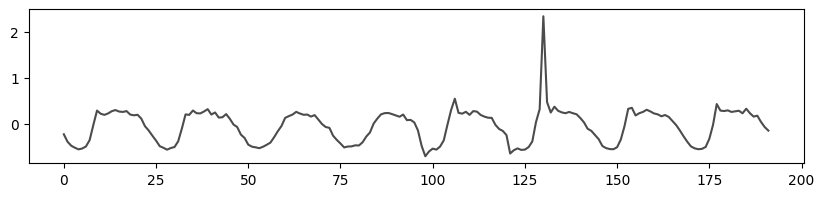

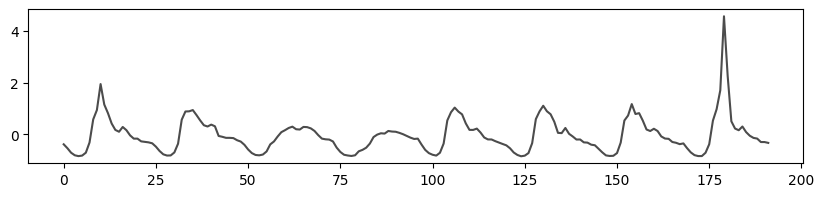

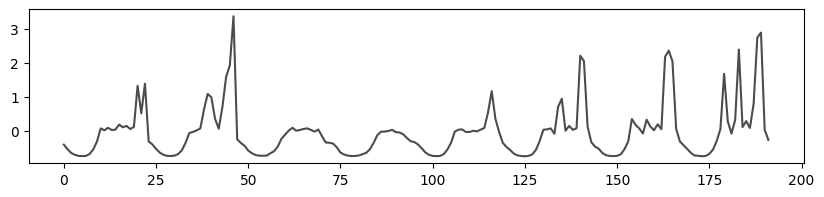

In [25]:
model.scaler = data_manager.scaler

vis(batch, model, num_chan=[0, 1, 9], batch_idx=0, context_length=96, prediction_length=96)

In [24]:
trainer = Trainer(
    accelerator="gpu",
    devices=1,
    strategy="auto",
    max_epochs=50,
    use_distributed_sampler=False,
    limit_train_batches=100,
    log_every_n_steps=1,
    accumulate_grad_batches=1,
    default_root_dir='./results',
  check_val_every_n_epoch= 1,
  gradient_clip_val=0.5
)

Using default `ModelCheckpoint`. Consider installing `litmodels` package to enable `LitModelCheckpoint` for automatic upload to the Lightning model registry.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


### DDPM

In [27]:
model.scaler = data_manager.scaler
model.forecaster.prob_model.solver = 'ddpm'
model.forecaster.prob_model.solver_num_steps = 500
model.forecaster.prob_model.solver_schedule = 'linear'

In [28]:
model = model.to('cuda')

In [29]:
model.device

device(type='cuda', index=0)

In [30]:
for batch in test_dataloader:
    break

time_for_forecast(batch, model, n_repeats=1)

115.30591130256653

In [31]:
res = trainer.test(model=model, dataloaders=test_dataloader);

You are using a CUDA device ('NVIDIA H100 80GB HBM3') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: |          | 0/? [00:00<?, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      96_test_CRPS          0.20576870441436768
    96_test_CRPS-Sum        0.09640096127986908
      96_test_MASE          1.0171314477920532
       96_test_MSE           2.15342116355896
     96_test_MSE-Sum          2409.2470703125
       96_test_ND           0.24748101830482483
     96_test_ND-Sum         0.11014547199010849
      96_test_NRMSE         24.161190032958984
    96_test_NRMSE-Sum       0.9513880610466003
   96_test_weighted_ND      0.24748101830482483
 96_test_weighted_ND-Sum    0.11014547199010849
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


In [32]:
res

[{'96_test_ND': 0.24748101830482483,
  '96_test_ND-Sum': 0.11014547199010849,
  '96_test_weighted_ND': 0.24748101830482483,
  '96_test_weighted_ND-Sum': 0.11014547199010849,
  '96_test_CRPS': 0.20576870441436768,
  '96_test_CRPS-Sum': 0.09640096127986908,
  '96_test_NRMSE': 24.161190032958984,
  '96_test_NRMSE-Sum': 0.9513880610466003,
  '96_test_MSE': 2.15342116355896,
  '96_test_MSE-Sum': 2409.2470703125,
  '96_test_MASE': 1.0171314477920532}]

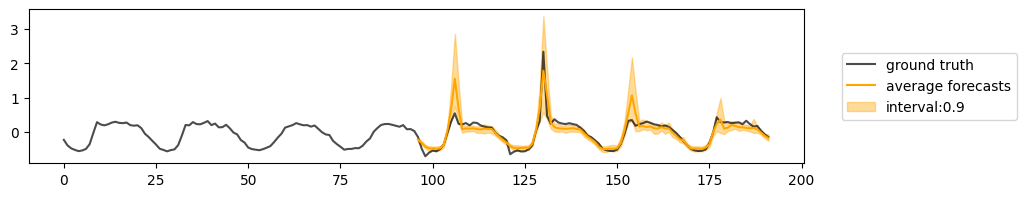

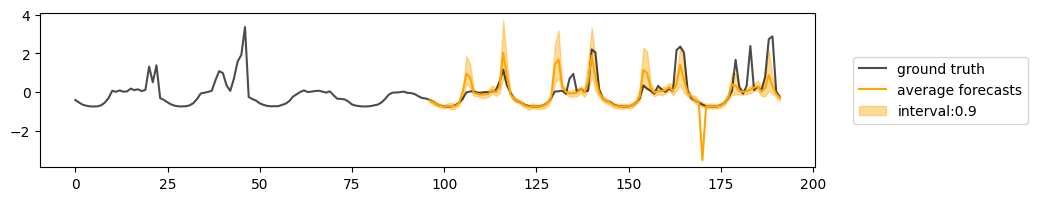

In [33]:
model = model.to('cuda')
forecast_and_visualize(batch, model, num_chan=[0, 1, 9], batch_idx=0, num_samples=50, context_length=96, prediction_length=96)

### Euler

In [34]:
model.scaler = data_manager.scaler
model.forecaster.prob_model.solver = 'euler'
model.forecaster.prob_model.solver_num_steps = 15
model.forecaster.prob_model.solver_schedule = 'linear'

for batch in test_dataloader:
    break

In [35]:
model = model.to('cuda')
steps = [10, 15, 20, 30, 50, 100]
euler_time = []
for num_steps in tqdm(steps):
    model.forecaster.prob_model.solver_num_steps = num_steps
    euler_time.append(time_for_forecast(batch, model, n_repeats=1))
euler_time

100%|██████████| 6/6 [00:49<00:00,  8.27s/it]


[2.144429922103882,
 3.282017230987549,
 4.36578893661499,
 6.609322547912598,
 11.092267274856567,
 22.109100818634033]

In [36]:
euler_metrics = check_metrics_for_samplers(test_dataloader, model, trainer, steps=[10, 15, 20, 30, 50, 100])

  0%|          | 0/6 [00:00<?, ?it/s]LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: |          | 0/? [00:00<?, ?it/s]

 17%|█▋        | 1/6 [06:35<32:58, 395.72s/it]LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      96_test_CRPS           1.368059515953064
    96_test_CRPS-Sum         22.87845802307129
      96_test_MASE          2.4683828353881836
       96_test_MSE             3.57763671875
     96_test_MSE-Sum             1624815.5
       96_test_ND           0.5730516314506531
     96_test_ND-Sum         25.122180938720703
      96_test_NRMSE          32.66164016723633
    96_test_NRMSE-Sum        25.52902603149414
   96_test_weighted_ND      0.5730516314506531
 96_test_weighted_ND-Sum    25.122180938720703
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


Testing: |          | 0/? [00:00<?, ?it/s]

 33%|███▎      | 2/6 [13:25<26:56, 404.04s/it]LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      96_test_CRPS          0.43472132086753845
    96_test_CRPS-Sum        2.6555707454681396
      96_test_MASE          2.3733673095703125
       96_test_MSE          0.5303446650505066
     96_test_MSE-Sum          51459.01953125
       96_test_ND           0.5517224669456482
     96_test_ND-Sum         3.6304478645324707
      96_test_NRMSE         12.578017234802246
    96_test_NRMSE-Sum         4.5496506690979
   96_test_weighted_ND      0.5517224669456482
 96_test_weighted_ND-Sum    3.6304478645324707
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


Testing: |          | 0/? [00:00<?, ?it/s]

 50%|█████     | 3/6 [20:39<20:52, 417.48s/it]LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      96_test_CRPS          0.30245208740234375
    96_test_CRPS-Sum        0.26944294571876526
      96_test_MASE           1.571004033088684
       96_test_MSE          0.10616932064294815
     96_test_MSE-Sum         1461.23974609375
       96_test_ND           0.37938594818115234
     96_test_ND-Sum          0.280862957239151
      96_test_NRMSE          5.624663829803467
    96_test_NRMSE-Sum       0.7706729173660278
   96_test_weighted_ND      0.37938594818115234
 96_test_weighted_ND-Sum     0.280862957239151
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


Testing: |          | 0/? [00:00<?, ?it/s]

 67%|██████▋   | 4/6 [28:30<14:37, 438.71s/it]LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      96_test_CRPS          0.21025243401527405
    96_test_CRPS-Sum        0.10772543400526047
      96_test_MASE          1.0630265474319458
       96_test_MSE          0.02858993411064148
     96_test_MSE-Sum         160.3426055908203
       96_test_ND           0.25924551486968994
     96_test_ND-Sum         0.12964852154254913
      96_test_NRMSE          2.896494150161743
    96_test_NRMSE-Sum        0.244390606880188
   96_test_weighted_ND      0.25924551486968994
 96_test_weighted_ND-Sum    0.12964852154254913
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


Testing: |          | 0/? [00:00<?, ?it/s]

 83%|████████▎ | 5/6 [37:40<07:58, 478.97s/it]LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      96_test_CRPS          0.20545797049999237
    96_test_CRPS-Sum        0.09961182624101639
      96_test_MASE           1.026979684829712
       96_test_MSE         0.035629305988550186
     96_test_MSE-Sum        142.73451232910156
       96_test_ND           0.2502727508544922
     96_test_ND-Sum         0.11618628352880478
      96_test_NRMSE         3.1418988704681396
    96_test_NRMSE-Sum       0.22476331889629364
   96_test_weighted_ND      0.2502727508544922
 96_test_weighted_ND-Sum    0.11618628352880478
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


Testing: |          | 0/? [00:00<?, ?it/s]

100%|██████████| 6/6 [50:10<00:00, 501.80s/it]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      96_test_CRPS          0.2048928290605545
    96_test_CRPS-Sum        0.09706464409828186
      96_test_MASE          1.0186164379119873
       96_test_MSE          0.11616380512714386
     96_test_MSE-Sum        242.41168212890625
       96_test_ND           0.2481108009815216
     96_test_ND-Sum         0.11189792305231094
      96_test_NRMSE          5.780324459075928
    96_test_NRMSE-Sum       0.3021133840084076
   96_test_weighted_ND      0.2481108009815216
 96_test_weighted_ND-Sum    0.11189792305231094
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


In [37]:
import pickle
with open("euler_metrics.pkl", "wb") as fp:
   pickle.dump(euler_metrics, fp)

10


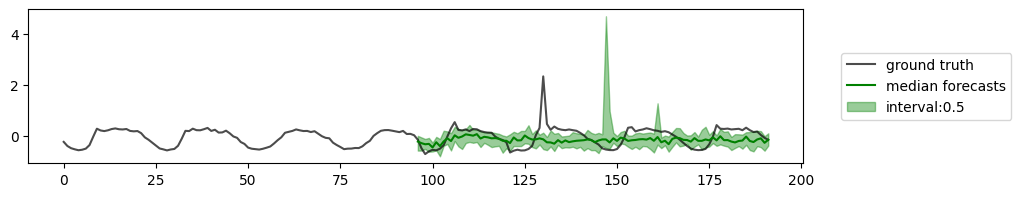

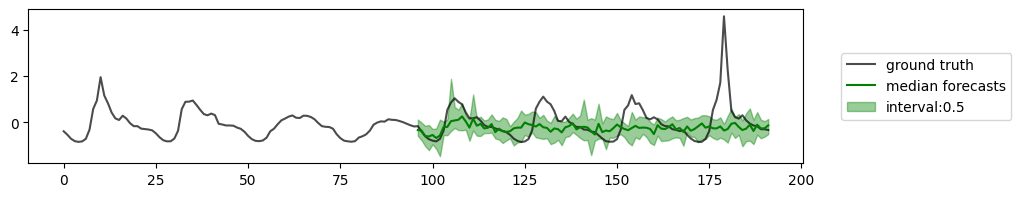

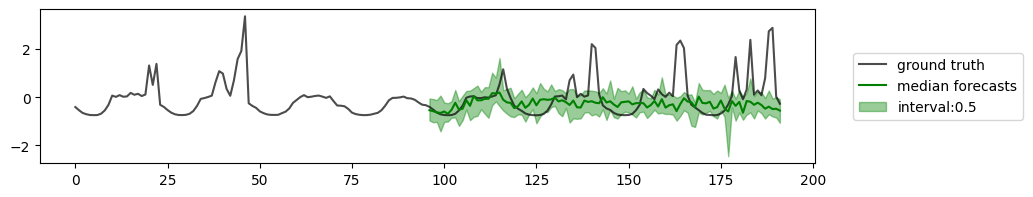

15


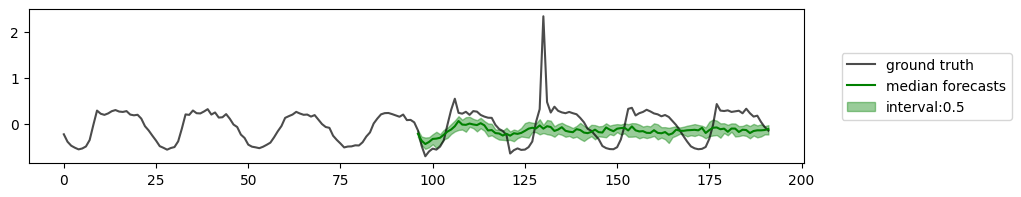

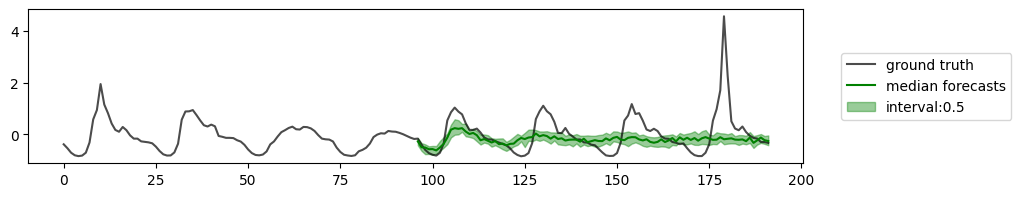

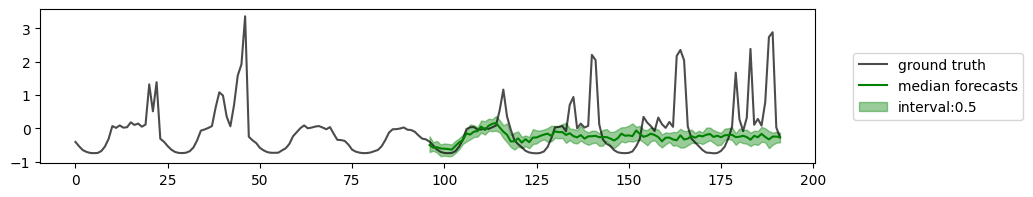

20


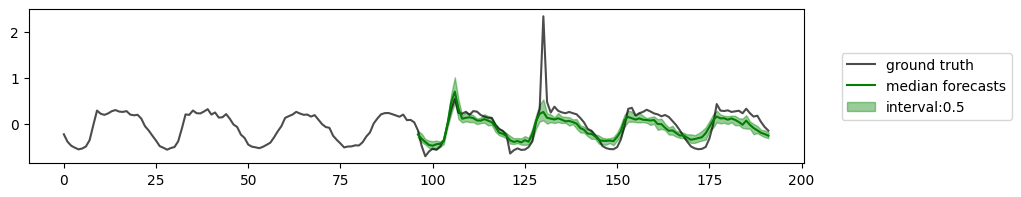

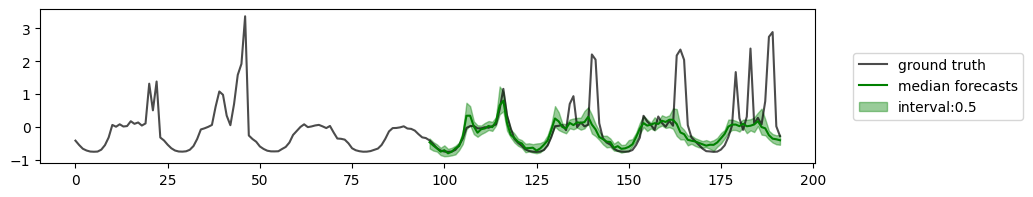

30


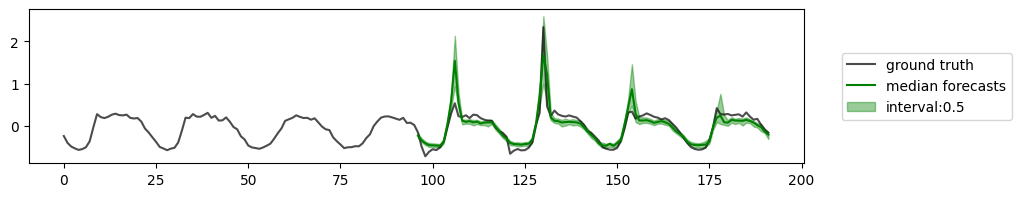

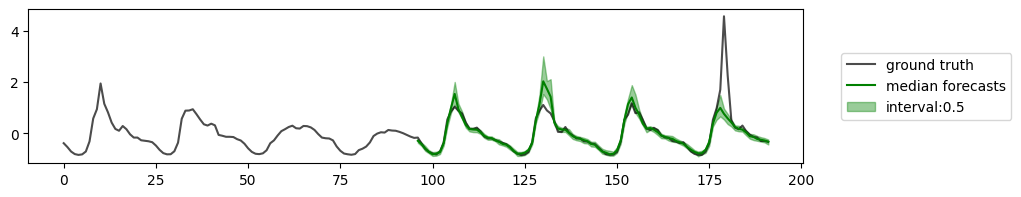

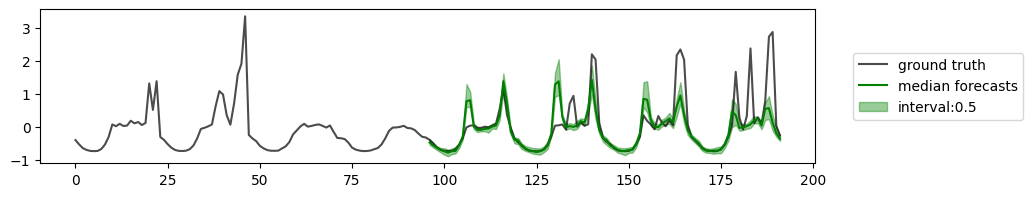

50


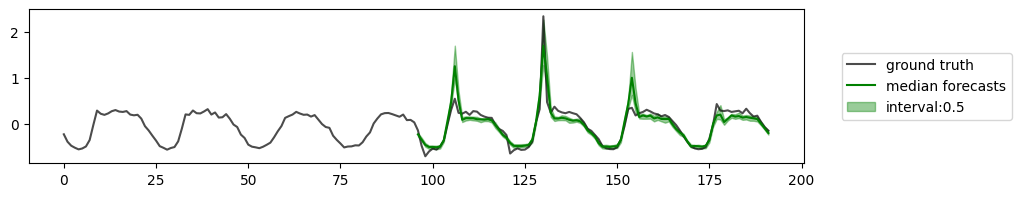

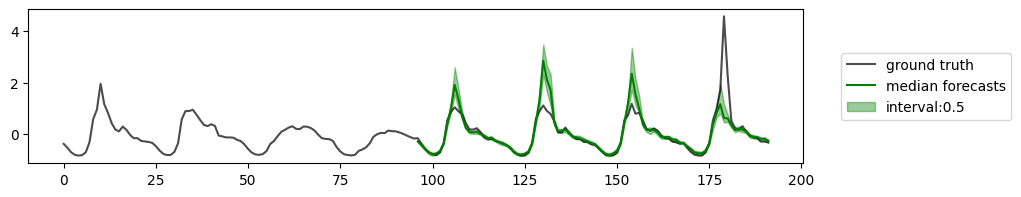

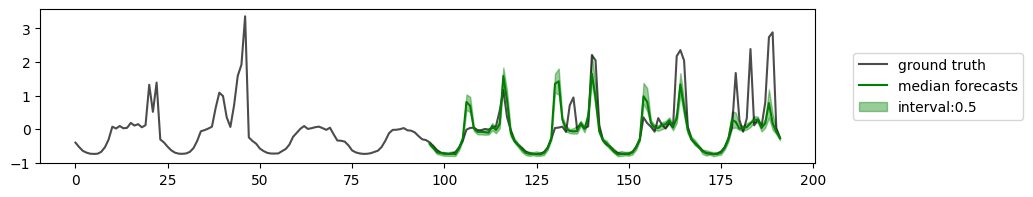

100


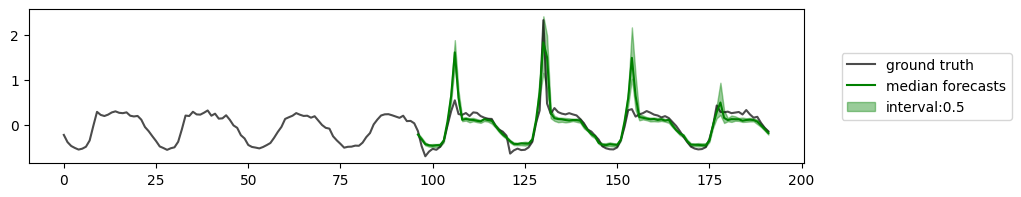

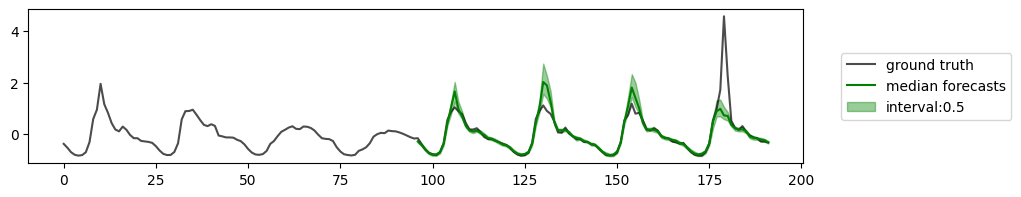

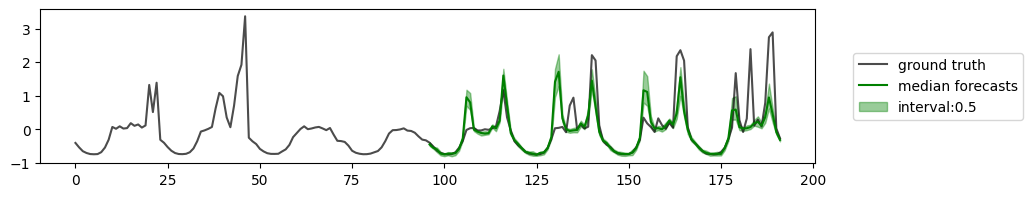

In [40]:
model = model.to('cuda')
for num_steps in steps:
    print(num_steps)
    model.forecaster.prob_model.solver_num_steps = num_steps
    forecast_and_visualize(batch, model, num_chan=[0, 1, 9], batch_idx=0, num_samples=50, context_length=96, prediction_length=96, point_type='median')
    plt.show()

### Heun

In [41]:
model.forecaster.prob_model.solver = 'heun'
model.scaler = data_manager.scaler
model.forecaster.prob_model.solver_num_steps = 15
model.forecaster.prob_model.solver_schedule = 'linear'
steps = [10, 15, 20, 30, 50, 100]

for batch in test_dataloader:
    break

In [42]:
model = model.to('cuda')

In [43]:
heun_time = []
for num_steps in tqdm(steps):
    model.forecaster.prob_model.solver_num_steps = num_steps // 2
    heun_time.append(time_for_forecast(batch, model, n_repeats=1))
heun_time

100%|██████████| 6/6 [00:48<00:00,  8.14s/it]


[1.925086259841919,
 2.8491714000701904,
 4.210555791854858,
 6.499711990356445,
 11.030452966690063,
 22.30366587638855]

In [44]:
heun_metrics = check_metrics_for_samplers(test_dataloader, model, trainer, steps=[step // 2 for step in steps])

  0%|          | 0/6 [00:00<?, ?it/s]LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: |          | 0/? [00:00<?, ?it/s]

 17%|█▋        | 1/6 [06:28<32:22, 388.42s/it]LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      96_test_CRPS          23.962675094604492
    96_test_CRPS-Sum        113.00753784179688
      96_test_MASE           5.752023696899414
       96_test_MSE           69.25039672851562
     96_test_MSE-Sum            36540244.0
       96_test_ND           1.3781861066818237
     96_test_ND-Sum          120.5918197631836
      96_test_NRMSE         143.65585327148438
    96_test_NRMSE-Sum       121.01725006103516
   96_test_weighted_ND      1.3781861066818237
 96_test_weighted_ND-Sum     120.5918197631836
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


Testing: |          | 0/? [00:00<?, ?it/s]

 33%|███▎      | 2/6 [13:12<26:30, 397.55s/it]LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      96_test_CRPS          10.745494842529297
    96_test_CRPS-Sum        163.75804138183594
      96_test_MASE           2.499685287475586
       96_test_MSE          163.96011352539062
     96_test_MSE-Sum            80248448.0
       96_test_ND            0.583274245262146
     96_test_ND-Sum         177.63119506835938
      96_test_NRMSE         221.05198669433594
    96_test_NRMSE-Sum       179.34909057617188
   96_test_weighted_ND       0.583274245262146
 96_test_weighted_ND-Sum    177.63119506835938
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


Testing: |          | 0/? [00:00<?, ?it/s]

 50%|█████     | 3/6 [20:19<20:33, 411.12s/it]LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      96_test_CRPS          0.5525916814804077
    96_test_CRPS-Sum         68.33929443359375
      96_test_MASE           2.437812089920044
       96_test_MSE           70.34980010986328
     96_test_MSE-Sum            18535598.0
       96_test_ND           0.5642498731613159
     96_test_ND-Sum          81.7003173828125
      96_test_NRMSE         144.79566955566406
    96_test_NRMSE-Sum        86.20628356933594
   96_test_weighted_ND      0.5642498731613159
 96_test_weighted_ND-Sum     81.7003173828125
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


Testing: |          | 0/? [00:00<?, ?it/s]

 67%|██████▋   | 4/6 [28:03<14:24, 432.11s/it]LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      96_test_CRPS          0.3996160626411438
    96_test_CRPS-Sum         5.413491249084473
      96_test_MASE           2.104496717453003
       96_test_MSE          19.295764923095703
     96_test_MSE-Sum            668052.9375
       96_test_ND           0.49324119091033936
     96_test_ND-Sum          5.613882541656494
      96_test_NRMSE          75.85018157958984
    96_test_NRMSE-Sum       16.377023696899414
   96_test_weighted_ND      0.49324119091033936
 96_test_weighted_ND-Sum     5.613882541656494
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


Testing: |          | 0/? [00:00<?, ?it/s]

 83%|████████▎ | 5/6 [37:09<07:52, 472.85s/it]LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      96_test_CRPS          0.20839744806289673
    96_test_CRPS-Sum        0.10269374400377274
      96_test_MASE          1.0544075965881348
       96_test_MSE          1.1772472858428955
     96_test_MSE-Sum         2245.270751953125
       96_test_ND           0.2556259334087372
     96_test_ND-Sum          0.120260089635849
      96_test_NRMSE          18.60704231262207
    96_test_NRMSE-Sum       0.9481200575828552
   96_test_weighted_ND      0.2556259334087372
 96_test_weighted_ND-Sum     0.120260089635849
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


Testing: |          | 0/? [00:00<?, ?it/s]

100%|██████████| 6/6 [49:34<00:00, 495.79s/it]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      96_test_CRPS          0.2046789824962616
    96_test_CRPS-Sum        0.09503938257694244
      96_test_MASE          1.0165395736694336
       96_test_MSE          0.6469218730926514
     96_test_MSE-Sum          841.67822265625
       96_test_ND           0.2470507025718689
     96_test_ND-Sum         0.10838618874549866
      96_test_NRMSE         13.482329368591309
    96_test_NRMSE-Sum        0.571275532245636
   96_test_weighted_ND      0.2470507025718689
 96_test_weighted_ND-Sum    0.10838618874549866
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


In [45]:
import pickle
with open("heun_metrics.pkl", "wb") as fp:
   pickle.dump(heun_metrics, fp)

10


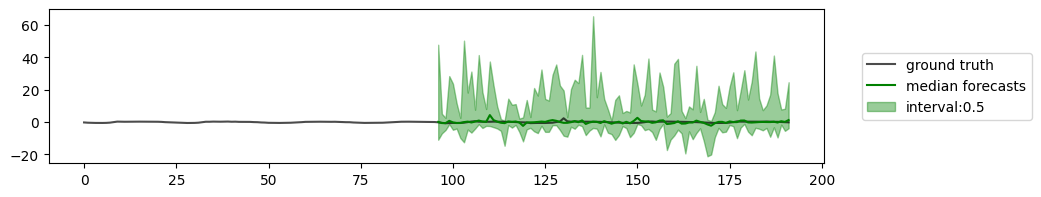

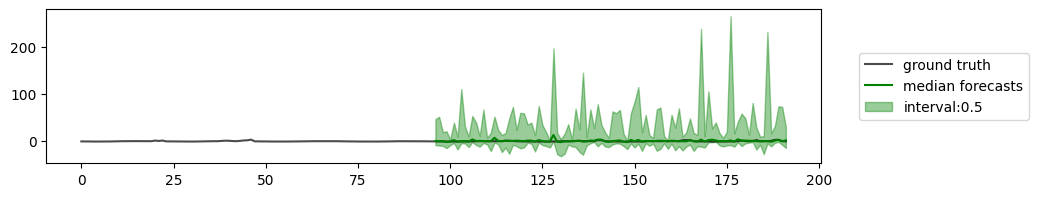

15


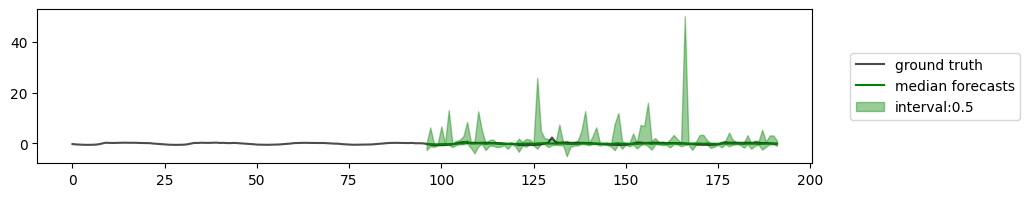

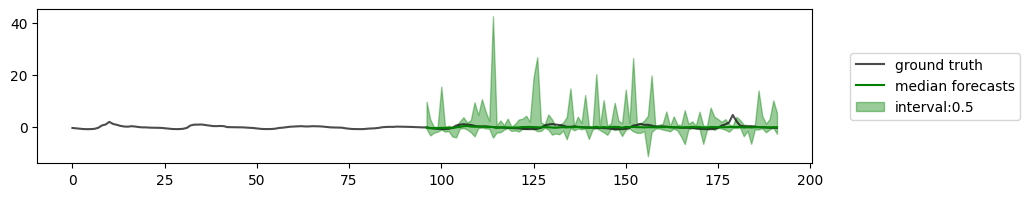

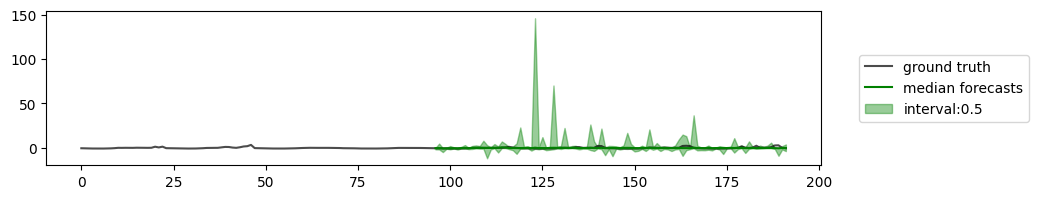

20


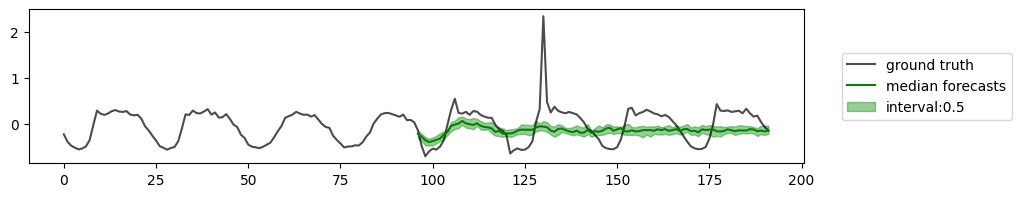

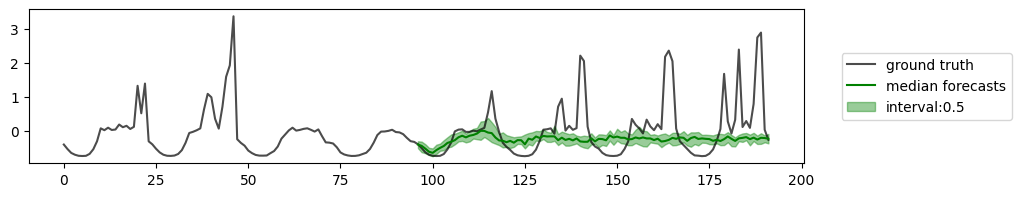

30


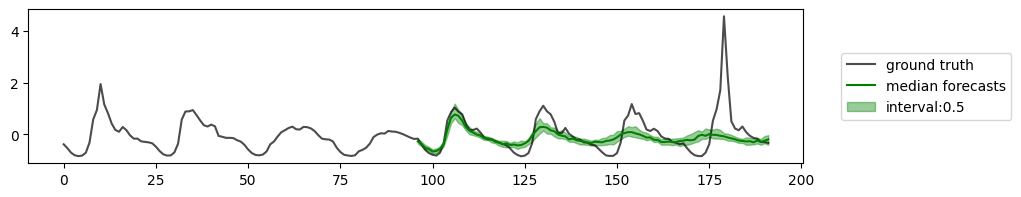

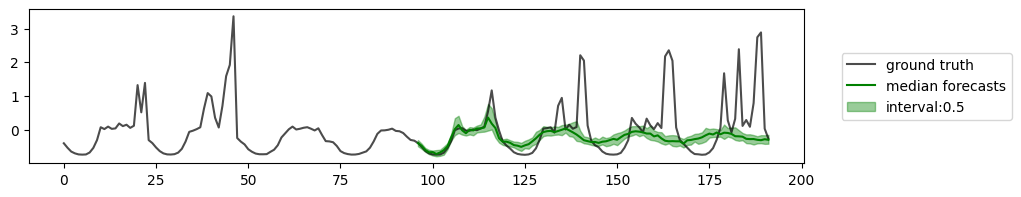

50


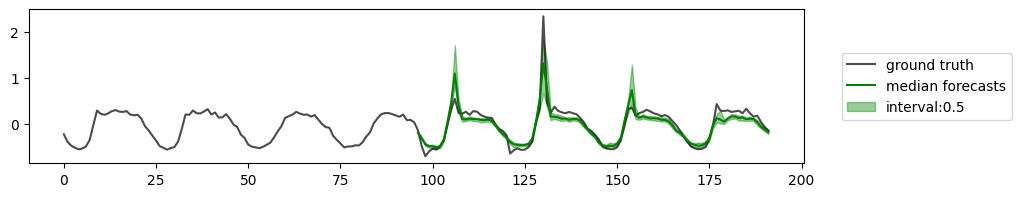

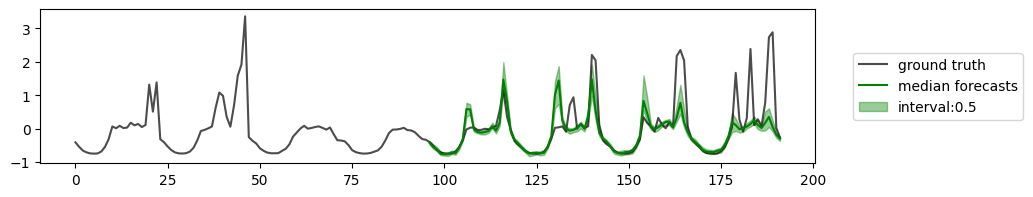

100


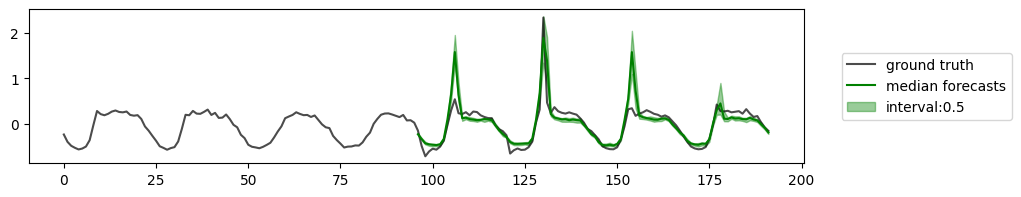

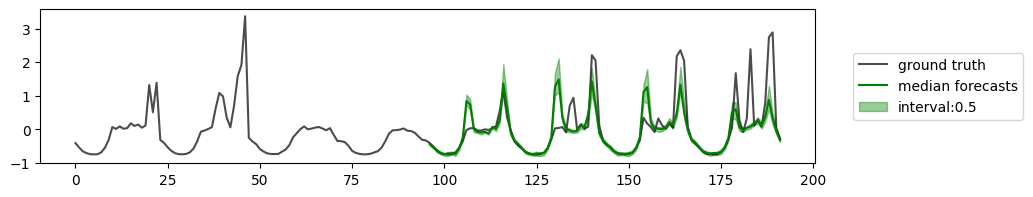

In [46]:
model = model.to('cuda')
for num_steps in steps:
    print(num_steps)
    model.forecaster.prob_model.solver_num_steps = num_steps // 2
    forecast_and_visualize(batch, model, num_chan=[0, 1, 9], batch_idx=0, num_samples=50, context_length=96, prediction_length=96, point_type='median')
    plt.show()

### DDIM, quad

In [47]:
model.forecaster.prob_model.solver = 'ddim'
model.scaler = data_manager.scaler
model.forecaster.prob_model.solver_num_steps = 15
model.forecaster.prob_model.solver_schedule = 'quad'
steps = [10, 15, 20, 30, 50, 100]

for batch in test_dataloader:
    break

In [48]:
model = model.to('cuda')
ddim_time = []
for num_steps in tqdm(steps):
    model.forecaster.prob_model.solver_num_steps = num_steps
    ddim_time.append(time_for_forecast(batch, model, n_repeats=1))
ddim_time

100%|██████████| 6/6 [00:49<00:00,  8.24s/it]


[2.086811065673828,
 3.19036865234375,
 4.346848487854004,
 6.505049467086792,
 11.023547649383545,
 22.290467500686646]

In [49]:
ddim_quad_metrics = check_metrics_for_samplers(test_dataloader, model, trainer, steps=steps)

  0%|          | 0/6 [00:00<?, ?it/s]LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: |          | 0/? [00:00<?, ?it/s]

 17%|█▋        | 1/6 [06:33<32:48, 393.60s/it]LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      96_test_CRPS          3.8125007152557373
    96_test_CRPS-Sum        10.209301948547363
      96_test_MASE           2.342578411102295
       96_test_MSE           5.731133937835693
     96_test_MSE-Sum            755409.0625
       96_test_ND           0.5471429228782654
     96_test_ND-Sum         14.137876510620117
      96_test_NRMSE         41.362030029296875
    96_test_NRMSE-Sum       17.362016677856445
   96_test_weighted_ND      0.5471429228782654
 96_test_weighted_ND-Sum    14.137876510620117
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


Testing: |          | 0/? [00:00<?, ?it/s]

 33%|███▎      | 2/6 [13:19<26:43, 400.89s/it]LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      96_test_CRPS          0.4468912184238434
    96_test_CRPS-Sum        1.3625476360321045
      96_test_MASE          2.4082958698272705
       96_test_MSE          2.0155630111694336
     96_test_MSE-Sum         7098.85107421875
       96_test_ND           0.5585124492645264
     96_test_ND-Sum         0.9849242568016052
      96_test_NRMSE          24.49319076538086
    96_test_NRMSE-Sum       1.6815922260284424
   96_test_weighted_ND      0.5585124492645264
 96_test_weighted_ND-Sum    0.9849242568016052
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


Testing: |          | 0/? [00:00<?, ?it/s]

 50%|█████     | 3/6 [20:23<20:34, 411.45s/it]LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      96_test_CRPS          0.4440564811229706
    96_test_CRPS-Sum        0.9233593344688416
      96_test_MASE          2.3872568607330322
       96_test_MSE          1.6756025552749634
     96_test_MSE-Sum          8934.455078125
       96_test_ND           0.5544617176055908
     96_test_ND-Sum         0.5757148861885071
      96_test_NRMSE         22.339372634887695
    96_test_NRMSE-Sum       1.8963242769241333
   96_test_weighted_ND      0.5544617176055908
 96_test_weighted_ND-Sum    0.5757148861885071
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


Testing: |          | 0/? [00:00<?, ?it/s]

 67%|██████▋   | 4/6 [28:06<14:23, 431.58s/it]LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      96_test_CRPS          0.4377685487270355
    96_test_CRPS-Sum        0.6880791187286377
      96_test_MASE          2.3044989109039307
       96_test_MSE          1.4278181791305542
     96_test_MSE-Sum          10958.283203125
       96_test_ND            0.53712397813797
     96_test_ND-Sum         0.4572671353816986
      96_test_NRMSE         20.622478485107422
    96_test_NRMSE-Sum       2.1018218994140625
   96_test_weighted_ND       0.53712397813797
 96_test_weighted_ND-Sum    0.4572671353816986
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


Testing: |          | 0/? [00:00<?, ?it/s]

 83%|████████▎ | 5/6 [37:07<07:51, 471.21s/it]LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      96_test_CRPS           0.426392525434494
    96_test_CRPS-Sum        0.6674664616584778
      96_test_MASE          2.2231884002685547
       96_test_MSE          1.4052900075912476
     96_test_MSE-Sum          14539.072265625
       96_test_ND           0.5203646421432495
     96_test_ND-Sum         0.4597036838531494
      96_test_NRMSE         20.470617294311523
    96_test_NRMSE-Sum       2.4225237369537354
   96_test_weighted_ND      0.5203646421432495
 96_test_weighted_ND-Sum    0.4597036838531494
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


Testing: |          | 0/? [00:00<?, ?it/s]

100%|██████████| 6/6 [49:28<00:00, 494.71s/it]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      96_test_CRPS          0.4091641306877136
    96_test_CRPS-Sum        0.5997684001922607
      96_test_MASE           2.112732172012329
       96_test_MSE          1.3955885171890259
     96_test_MSE-Sum         13995.4189453125
       96_test_ND           0.49661439657211304
     96_test_ND-Sum         0.4198514223098755
      96_test_NRMSE         20.377737045288086
    96_test_NRMSE-Sum       2.3744492530822754
   96_test_weighted_ND      0.49661439657211304
 96_test_weighted_ND-Sum    0.4198514223098755
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


In [50]:
with open("ddim_quad_metrics.pkl", "wb") as fp:
   pickle.dump(ddim_quad_metrics, fp)

10


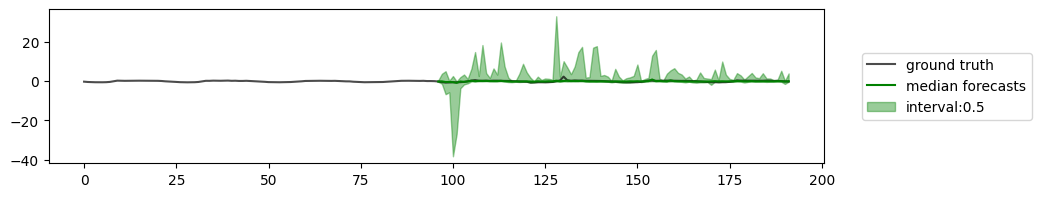

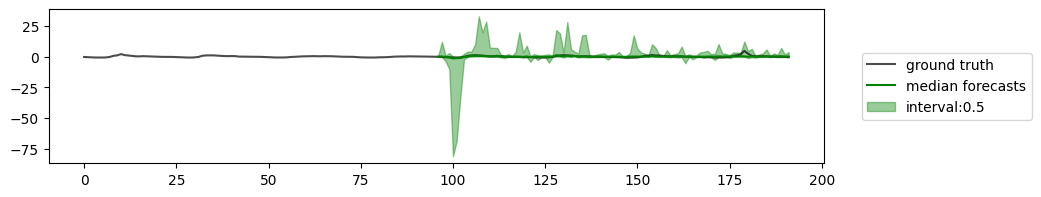

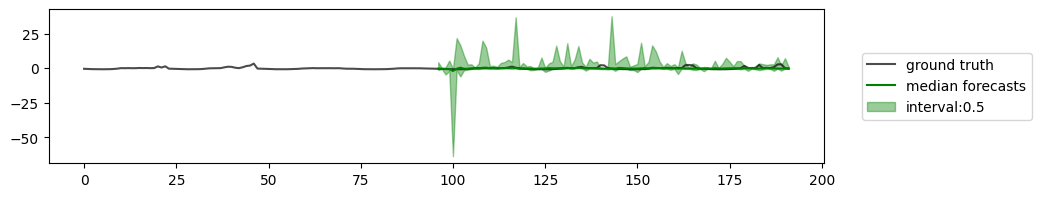

15


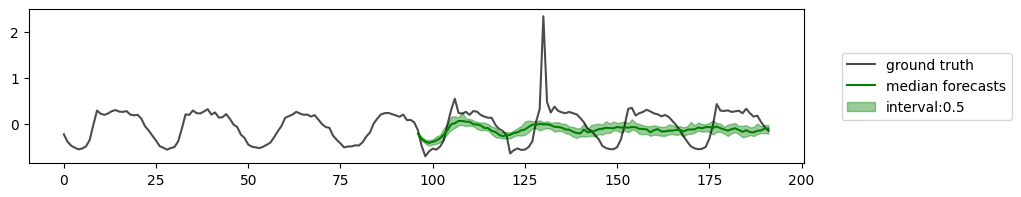

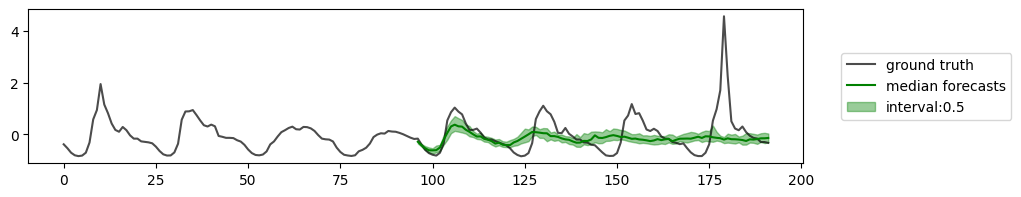

20


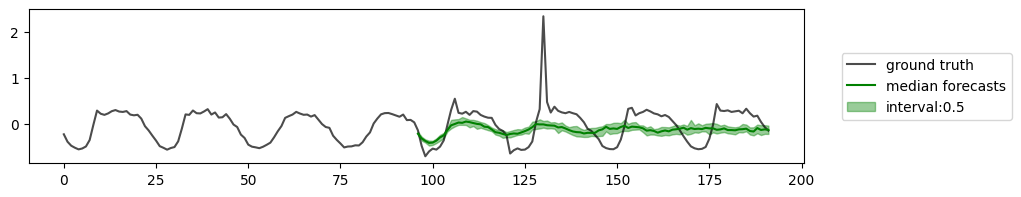

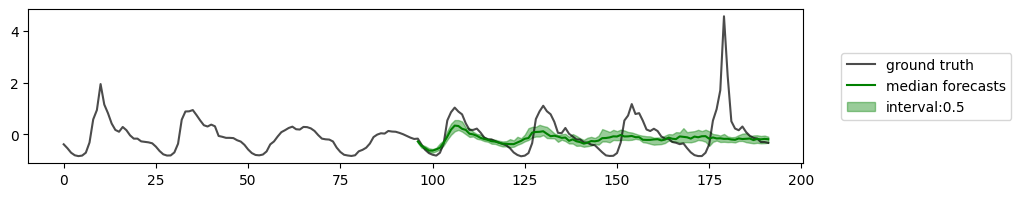

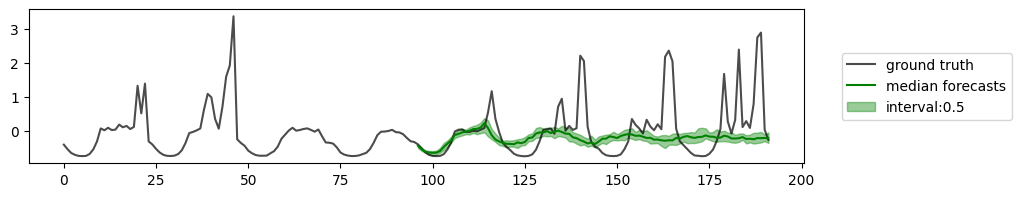

30


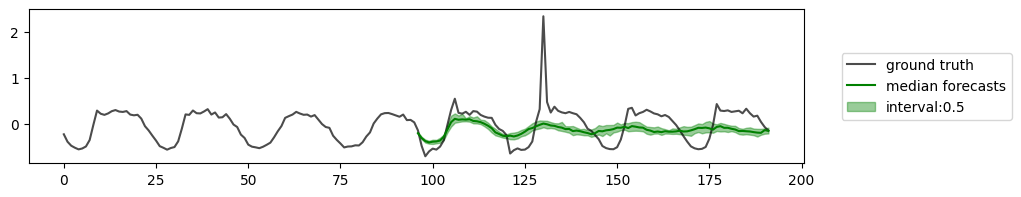

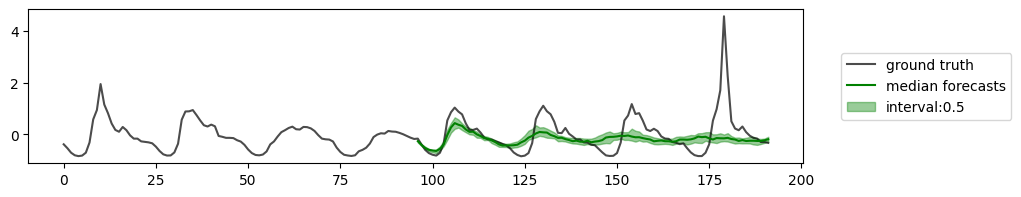

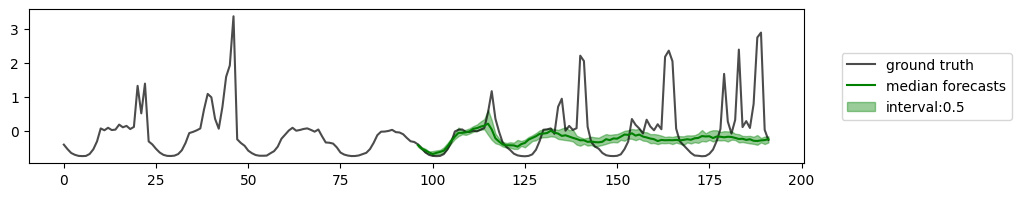

50


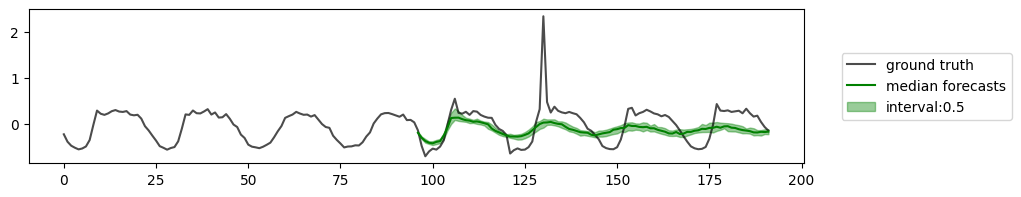

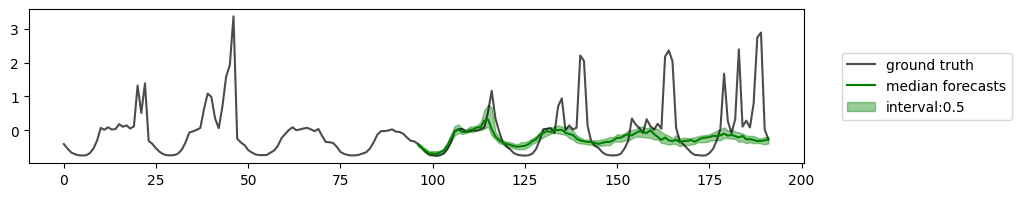

100


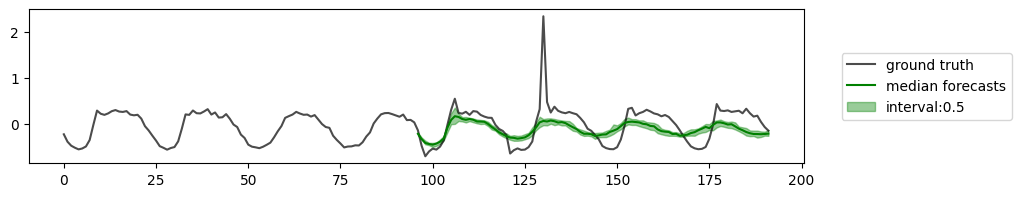

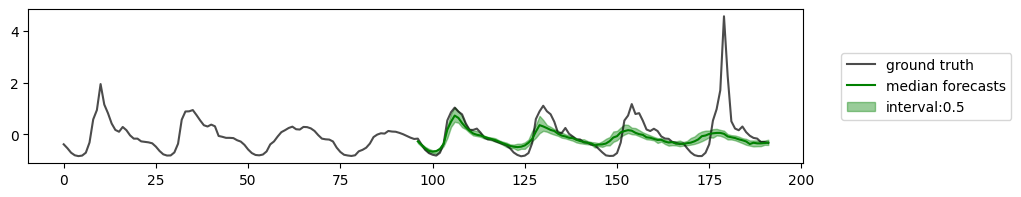

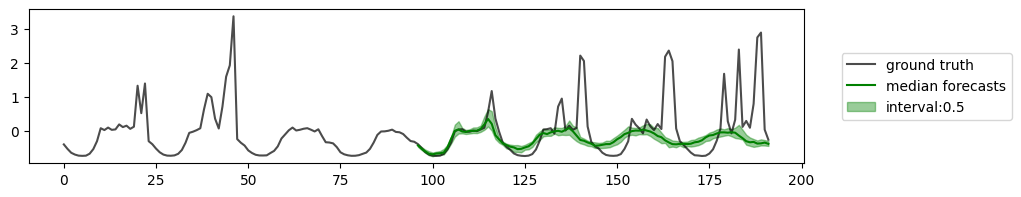

In [51]:
model = model.to('cuda')
for num_steps in steps:
    print(num_steps)
    model.forecaster.prob_model.solver_num_steps = num_steps
    forecast_and_visualize(batch, model, num_chan=[0, 1, 9], batch_idx=0, num_samples=50, context_length=96, prediction_length=96, point_type='median')
    plt.show()

### DDIM, linear

In [52]:
model.forecaster.prob_model.solver_schedule = 'linear'

10


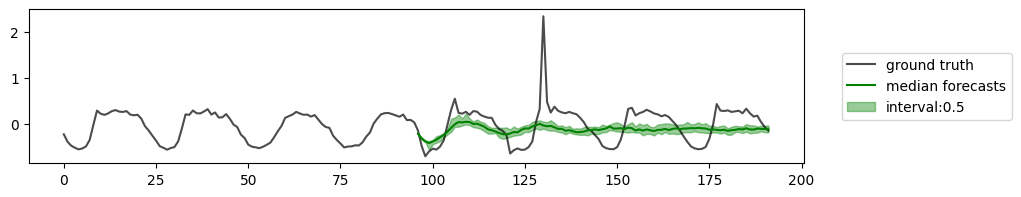

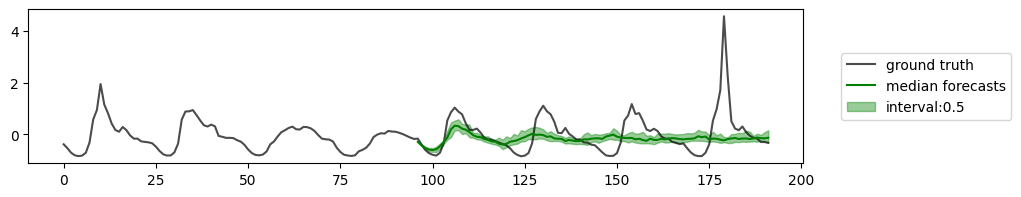

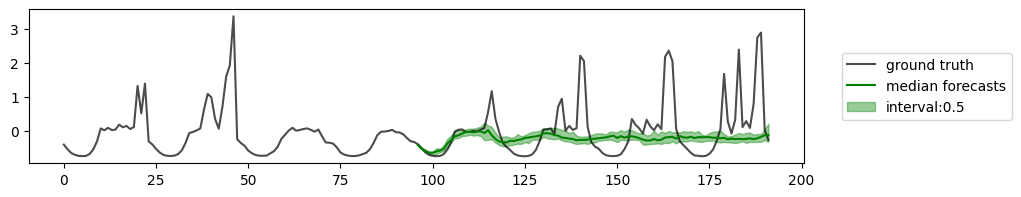

15


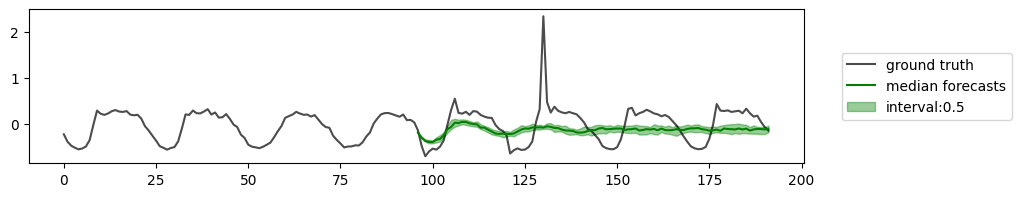

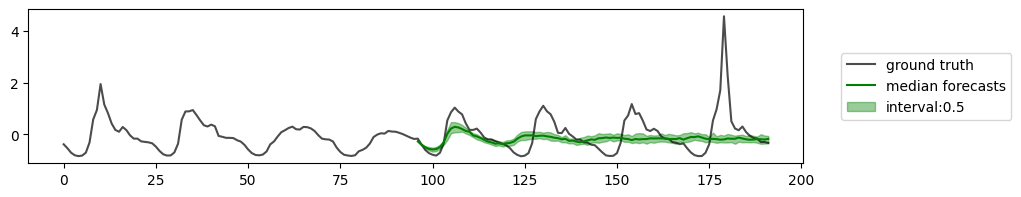

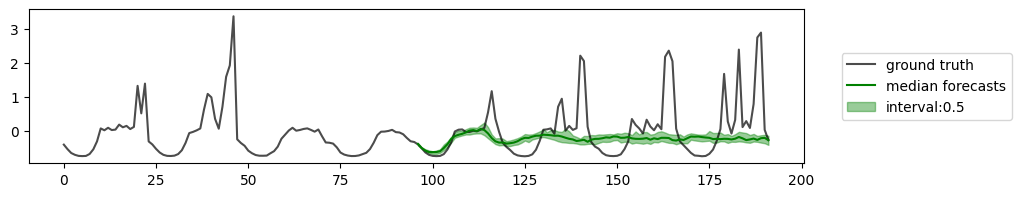

20


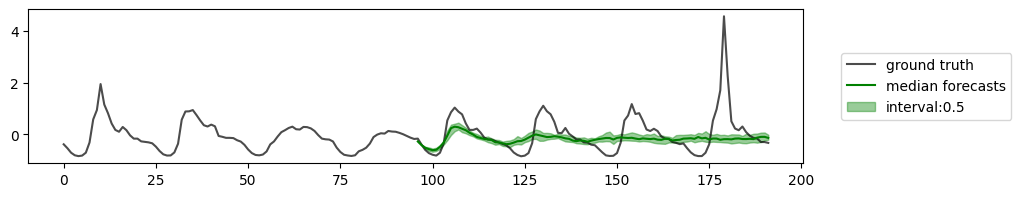

30


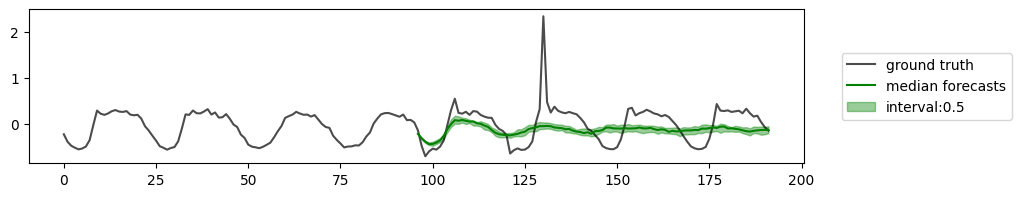

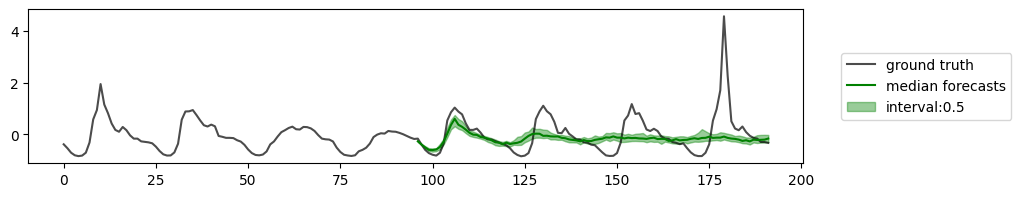

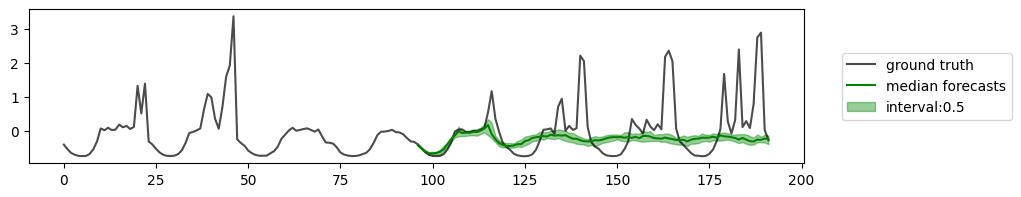

50


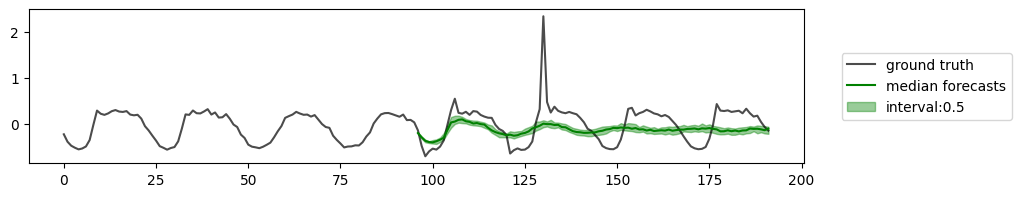

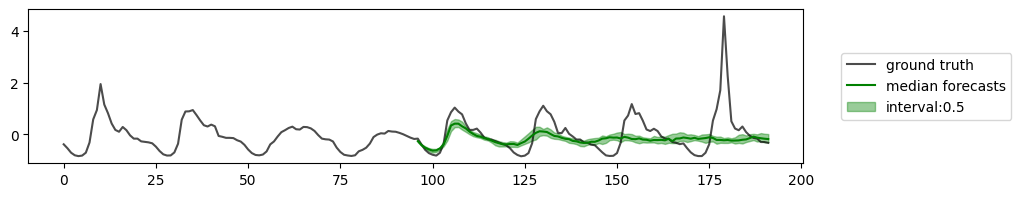

100


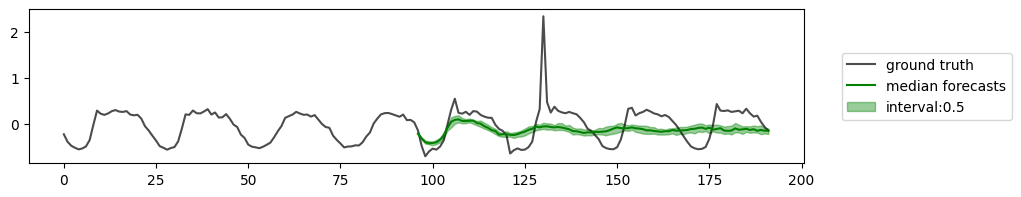

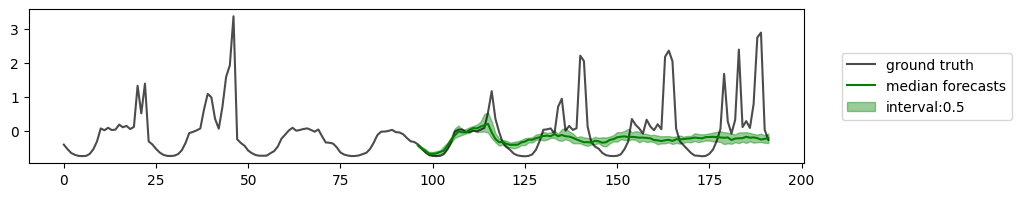

In [54]:
model.forecaster.prob_model.solver_schedule = 'linear'

model = model.to('cuda')
for num_steps in steps:
    print(num_steps)
    model.forecaster.prob_model.solver_num_steps = num_steps
    forecast_and_visualize(batch, model, num_chan=[0, 1, 9], batch_idx=0, num_samples=50, context_length=96, prediction_length=96, point_type='median')
    plt.show()

In [ ]:
ddim_linear_metrics = check_metrics_for_samplers(test_dataloader, model, trainer, steps=steps)

  0%|          | 0/6 [00:00<?, ?it/s]LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: |          | 0/? [00:00<?, ?it/s]

 17%|█▋        | 1/6 [06:26<32:13, 386.76s/it]LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      96_test_CRPS          0.4700181782245636
    96_test_CRPS-Sum         8.929570198059082
      96_test_MASE          2.4055633544921875
       96_test_MSE            154.0029296875
     96_test_MSE-Sum            988436.0625
       96_test_ND           0.5577449202537537
     96_test_ND-Sum          3.26727032661438
      96_test_NRMSE         214.48329162597656
    96_test_NRMSE-Sum       19.930341720581055
   96_test_weighted_ND      0.5577449202537537
 96_test_weighted_ND-Sum     3.26727032661438
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


Testing: |          | 0/? [00:00<?, ?it/s]

 33%|███▎      | 2/6 [13:09<26:24, 396.14s/it]LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      96_test_CRPS          0.45047083497047424
    96_test_CRPS-Sum         6.629889965057373
      96_test_MASE           2.398360252380371
       96_test_MSE          146.99179077148438
     96_test_MSE-Sum            1322366.375
       96_test_ND           0.5562600493431091
     96_test_ND-Sum         1.7094956636428833
      96_test_NRMSE         209.30734252929688
    96_test_NRMSE-Sum       23.028581619262695
   96_test_weighted_ND      0.5562600493431091
 96_test_weighted_ND-Sum    1.7094956636428833
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


Testing: |          | 0/? [00:00<?, ?it/s]

 50%|█████     | 3/6 [20:10<20:22, 407.52s/it]LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      96_test_CRPS          0.44797348976135254
    96_test_CRPS-Sum         5.651312351226807
      96_test_MASE           2.375589609146118
       96_test_MSE           122.6203842163086
     96_test_MSE-Sum            1349430.25
       96_test_ND           0.5517824292182922
     96_test_ND-Sum         2.3538243770599365
      96_test_NRMSE         191.19728088378906
    96_test_NRMSE-Sum        23.2775936126709
   96_test_weighted_ND      0.5517824292182922
 96_test_weighted_ND-Sum    2.3538243770599365
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


Testing: |          | 0/? [00:00<?, ?it/s]

 67%|██████▋   | 4/6 [27:51<14:17, 428.68s/it]LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      96_test_CRPS          0.44157207012176514
    96_test_CRPS-Sum         4.463620662689209
      96_test_MASE          2.3301608562469482
       96_test_MSE          115.68336486816406
     96_test_MSE-Sum            1190147.375
       96_test_ND           0.5418559312820435
     96_test_ND-Sum         1.1324812173843384
      96_test_NRMSE         185.85479736328125
    96_test_NRMSE-Sum       21.877784729003906
   96_test_weighted_ND      0.5418559312820435
 96_test_weighted_ND-Sum    1.1324812173843384
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


Testing: |          | 0/? [00:00<?, ?it/s]

 83%|████████▎ | 5/6 [36:54<07:49, 469.74s/it]LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      96_test_CRPS          0.4408787786960602
    96_test_CRPS-Sum         3.899592161178589
      96_test_MASE          2.3301358222961426
       96_test_MSE           114.3259048461914
     96_test_MSE-Sum            1113948.875
       96_test_ND           0.5422019958496094
     96_test_ND-Sum         0.9903352856636047
      96_test_NRMSE         184.66766357421875
    96_test_NRMSE-Sum       21.145095825195312
   96_test_weighted_ND      0.5422019958496094
 96_test_weighted_ND-Sum    0.9903352856636047
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


Testing: |          | 0/? [00:00<?, ?it/s]

In [ ]:
with open("ddim_linear_metrics.pkl", "wb") as fp:
   pickle.dump(ddim_linear_metrics, fp)

### DPM-Solver-1

In [25]:
model.forecaster.prob_model.solver = 'dpm1'
model.scaler = data_manager.scaler
model.forecaster.prob_model.solver_num_steps = 15
model.forecaster.prob_model.solver_schedule = 'linear'
steps = [10, 15, 20, 30, 50, 100]

for batch in test_dataloader:
    break

In [26]:
model = model.to('cuda')
dpm_time = []
for num_steps in tqdm(steps):
    model.forecaster.prob_model.solver_num_steps = num_steps
    dpm_time.append(time_for_forecast(batch, model, n_repeats=1))
dpm_time

100%|██████████| 6/6 [00:47<00:00,  7.89s/it]


[2.512939929962158,
 3.0346314907073975,
 4.078209400177002,
 6.200022459030151,
 10.441248416900635,
 20.99675726890564]

In [27]:
dpm1_metrics = check_metrics_for_samplers(test_dataloader, model, trainer, steps=steps)

  0%|          | 0/6 [00:00<?, ?it/s]You are using a CUDA device ('NVIDIA H100 80GB HBM3') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: |          | 0/? [00:00<?, ?it/s]

 17%|█▋        | 1/6 [06:24<32:04, 384.84s/it]LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      96_test_CRPS          0.46963173151016235
    96_test_CRPS-Sum         8.867996215820312
      96_test_MASE          2.4062039852142334
       96_test_MSE          155.56080627441406
     96_test_MSE-Sum             980722.0
       96_test_ND           0.5578397512435913
     96_test_ND-Sum          3.177683115005493
      96_test_NRMSE         215.34686279296875
    96_test_NRMSE-Sum       19.840333938598633
   96_test_weighted_ND      0.5578397512435913
 96_test_weighted_ND-Sum     3.177683115005493
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


Testing: |          | 0/? [00:00<?, ?it/s]

 33%|███▎      | 2/6 [13:06<26:19, 394.78s/it]LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      96_test_CRPS          0.4499110281467438
    96_test_CRPS-Sum         6.645738124847412
      96_test_MASE           2.396735429763794
       96_test_MSE          147.94256591796875
     96_test_MSE-Sum            1317881.875
       96_test_ND           0.5555208325386047
     96_test_ND-Sum         1.7165207862854004
      96_test_NRMSE          209.7650604248047
    96_test_NRMSE-Sum        22.98244857788086
   96_test_weighted_ND      0.5555208325386047
 96_test_weighted_ND-Sum    1.7165207862854004
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


Testing: |          | 0/? [00:00<?, ?it/s]

 50%|█████     | 3/6 [20:07<20:20, 406.75s/it]LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      96_test_CRPS          0.4491477608680725
    96_test_CRPS-Sum         5.695874214172363
      96_test_MASE           2.380005121231079
       96_test_MSE          123.81848907470703
     96_test_MSE-Sum            1377423.75
       96_test_ND           0.5526970624923706
     96_test_ND-Sum          2.436445951461792
      96_test_NRMSE         192.23153686523438
    96_test_NRMSE-Sum       23.516130447387695
   96_test_weighted_ND      0.5526970624923706
 96_test_weighted_ND-Sum     2.436445951461792
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


Testing: |          | 0/? [00:00<?, ?it/s]

 67%|██████▋   | 4/6 [27:49<14:16, 428.39s/it]LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      96_test_CRPS          0.44302934408187866
    96_test_CRPS-Sum         4.460565567016602
      96_test_MASE          2.3369107246398926
       96_test_MSE          116.06205749511719
     96_test_MSE-Sum            1185527.75
       96_test_ND           0.5436823964118958
     96_test_ND-Sum         1.1175119876861572
      96_test_NRMSE         185.95675659179688
    96_test_NRMSE-Sum       21.819120407104492
   96_test_weighted_ND      0.5436823964118958
 96_test_weighted_ND-Sum    1.1175119876861572
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


Testing: |          | 0/? [00:00<?, ?it/s]

 83%|████████▎ | 5/6 [36:49<07:48, 468.84s/it]LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      96_test_CRPS          0.44020143151283264
    96_test_CRPS-Sum        3.9242606163024902
      96_test_MASE           2.327359914779663
       96_test_MSE          116.45274353027344
     96_test_MSE-Sum            1138782.375
       96_test_ND           0.5412917137145996
     96_test_ND-Sum         1.0044512748718262
      96_test_NRMSE          186.2571563720703
    96_test_NRMSE-Sum       21.365985870361328
   96_test_weighted_ND      0.5412917137145996
 96_test_weighted_ND-Sum    1.0044512748718262
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


Testing: |          | 0/? [00:00<?, ?it/s]

100%|██████████| 6/6 [49:08<00:00, 491.48s/it]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      96_test_CRPS          0.43434032797813416
    96_test_CRPS-Sum        3.9684536457061768
      96_test_MASE          2.2932486534118652
       96_test_MSE           119.6644058227539
     96_test_MSE-Sum            1239047.25
       96_test_ND           0.5340405106544495
     96_test_ND-Sum         0.9802984595298767
      96_test_NRMSE         188.70016479492188
    96_test_NRMSE-Sum       22.282339096069336
   96_test_weighted_ND      0.5340405106544495
 96_test_weighted_ND-Sum    0.9802984595298767
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


In [29]:
import pickle
with open("dpm1_metrics.pkl", "wb") as fp:
   pickle.dump(dpm1_metrics, fp)

10


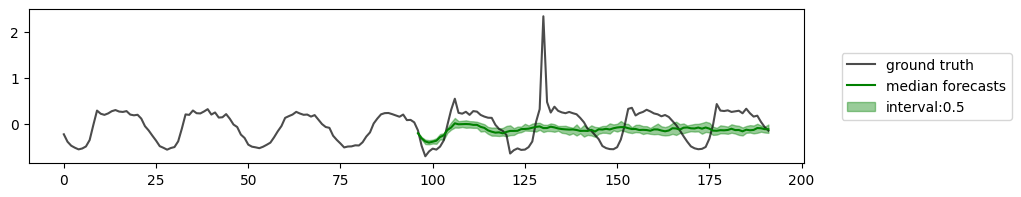

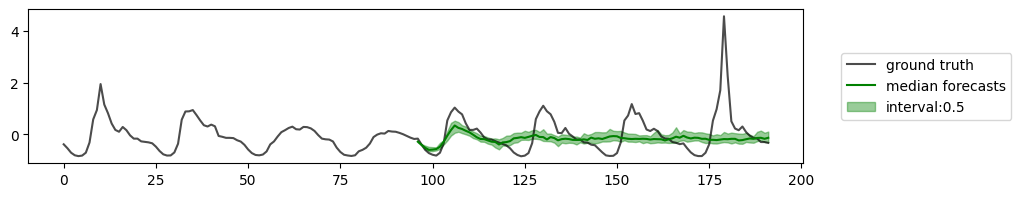

15


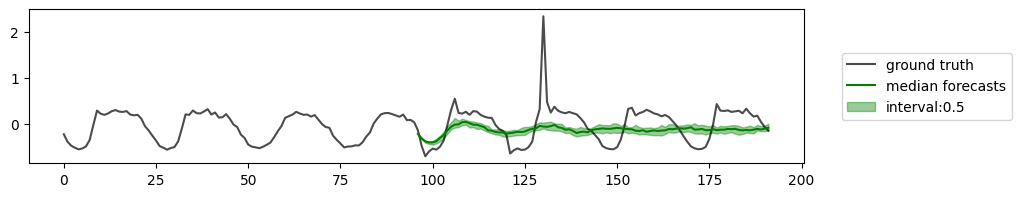

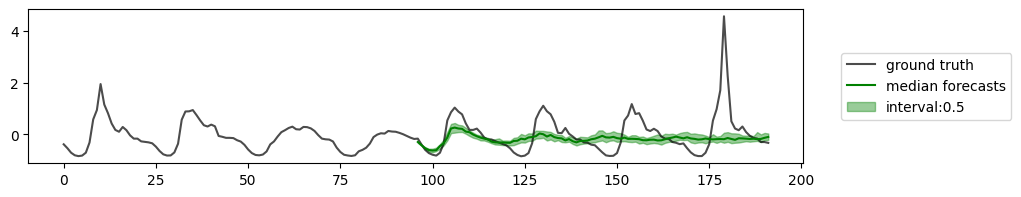

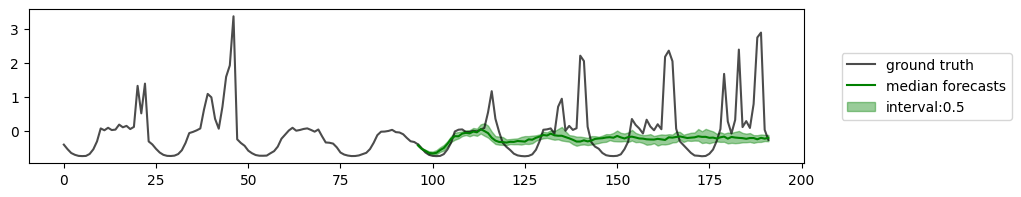

20


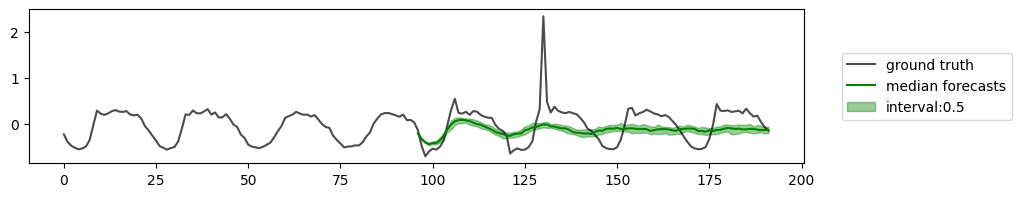

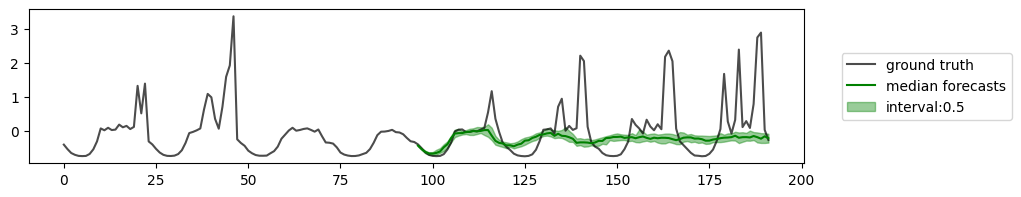

30


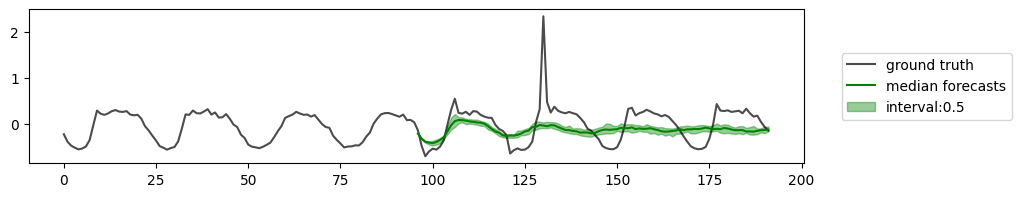

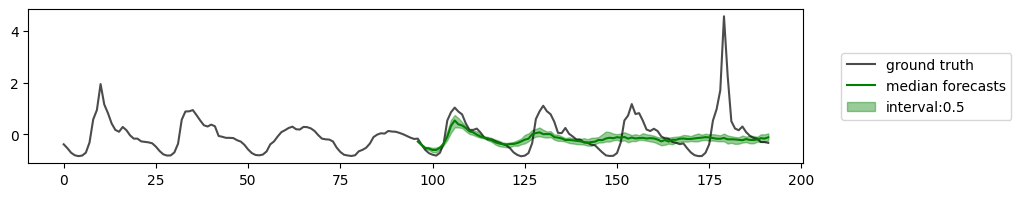

50


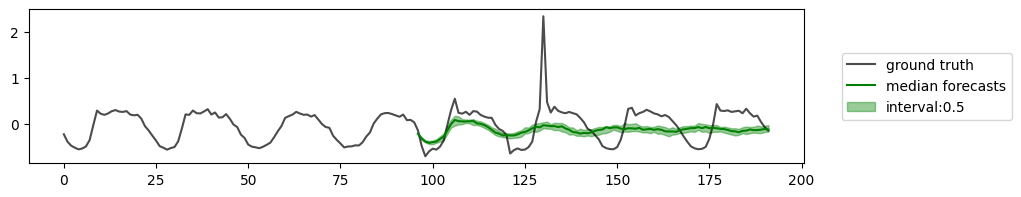

100


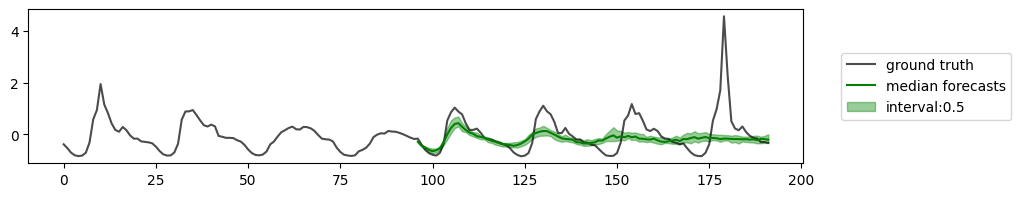

In [30]:
model = model.to('cuda')
for num_steps in steps:
    print(num_steps)
    model.forecaster.prob_model.solver_num_steps = num_steps
    forecast_and_visualize(batch, model, num_chan=[0, 1, 9], batch_idx=0, num_samples=50, context_length=96, prediction_length=96, point_type='median')
    plt.show()

### DPM-Solver-2

In [31]:
model.forecaster.prob_model.solver = 'dpm2'

In [32]:
model = model.to('cuda')
dpm_time = []
for num_steps in tqdm(steps):
    model.forecaster.prob_model.solver_num_steps = num_steps // 2
    dpm_time.append(time_for_forecast(batch, model, n_repeats=1))
dpm_time

100%|██████████| 6/6 [00:46<00:00,  7.79s/it]


[1.862715721130371,
 2.7080540657043457,
 4.0167152881622314,
 6.199696063995361,
 10.521745681762695,
 21.41831636428833]

In [33]:
dpm2_metrics = check_metrics_for_samplers(test_dataloader, model, trainer, steps=[step // 2 for step in steps])

  0%|          | 0/6 [00:00<?, ?it/s]LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: |          | 0/? [00:00<?, ?it/s]

 17%|█▋        | 1/6 [06:27<32:18, 387.70s/it]LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      96_test_CRPS            7289.240234375
    96_test_CRPS-Sum         2974.691650390625
      96_test_MASE           12294.6708984375
       96_test_MSE             148277.296875
     96_test_MSE-Sum           44824395776.0
       96_test_ND            2896.297607421875
     96_test_ND-Sum          4116.20166015625
      96_test_NRMSE           6648.794921875
    96_test_NRMSE-Sum         4240.138671875
   96_test_weighted_ND       2896.297607421875
 96_test_weighted_ND-Sum     4116.20166015625
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


Testing: |          | 0/? [00:00<?, ?it/s]

 33%|███▎      | 2/6 [13:11<26:29, 397.34s/it]LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      96_test_CRPS          1.4529986381530762
    96_test_CRPS-Sum         20.31426239013672
      96_test_MASE           2.959760904312134
       96_test_MSE           265.1560974121094
     96_test_MSE-Sum             6061966.0
       96_test_ND           0.6855345368385315
     96_test_ND-Sum          24.48041343688965
      96_test_NRMSE         281.07257080078125
    96_test_NRMSE-Sum        49.29981994628906
   96_test_weighted_ND      0.6855345368385315
 96_test_weighted_ND-Sum     24.48041343688965
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


Testing: |          | 0/? [00:00<?, ?it/s]

 50%|█████     | 3/6 [20:17<20:31, 410.33s/it]LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      96_test_CRPS          0.39469054341316223
    96_test_CRPS-Sum         3.206350803375244
      96_test_MASE          2.0530197620391846
       96_test_MSE          115.72718811035156
     96_test_MSE-Sum            1196981.75
       96_test_ND           0.4839437007904053
     96_test_ND-Sum         0.5569890737533569
      96_test_NRMSE         185.69802856445312
    96_test_NRMSE-Sum        21.93269920349121
   96_test_weighted_ND      0.4839437007904053
 96_test_weighted_ND-Sum    0.5569890737533569
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


Testing: |          | 0/? [00:00<?, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      96_test_CRPS          0.41832661628723145
    96_test_CRPS-Sum         1.891317367553711
      96_test_MASE          2.2131905555725098
       96_test_MSE          55.685855865478516
     96_test_MSE-Sum            444262.9375
       96_test_ND           0.5168648362159729
     96_test_ND-Sum         0.7947542071342468
      96_test_NRMSE          128.9324493408203
    96_test_NRMSE-Sum       13.368556022644043
   96_test_weighted_ND      0.5168648362159729
 96_test_weighted_ND-Sum    0.7947542071342468
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


 67%|██████▋   | 4/6 [28:01<14:22, 431.34s/it]LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: |          | 0/? [00:00<?, ?it/s]

 83%|████████▎ | 5/6 [37:01<07:50, 470.53s/it]LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      96_test_CRPS          0.44376179575920105
    96_test_CRPS-Sum         5.667973518371582
      96_test_MASE          2.3611929416656494
       96_test_MSE          117.11017608642578
     96_test_MSE-Sum             1584470.0
       96_test_ND           0.5483431220054626
     96_test_ND-Sum          3.881056785583496
      96_test_NRMSE         186.81069946289062
    96_test_NRMSE-Sum        25.20210075378418
   96_test_weighted_ND      0.5483431220054626
 96_test_weighted_ND-Sum     3.881056785583496
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


Testing: |          | 0/? [00:00<?, ?it/s]

100%|██████████| 6/6 [49:18<00:00, 493.16s/it]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      96_test_CRPS          0.2903057336807251
    96_test_CRPS-Sum        0.4354519248008728
      96_test_MASE          1.4395320415496826
       96_test_MSE           13.09310531616211
     96_test_MSE-Sum           63809.5546875
       96_test_ND           0.34690508246421814
     96_test_ND-Sum         0.23314067721366882
      96_test_NRMSE          62.32863998413086
    96_test_NRMSE-Sum        5.056413650512695
   96_test_weighted_ND      0.34690508246421814
 96_test_weighted_ND-Sum    0.23314067721366882
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


In [34]:
import pickle
with open("dpm2_metrics.pkl", "wb") as fp:
   pickle.dump(dpm2_metrics, fp)

10


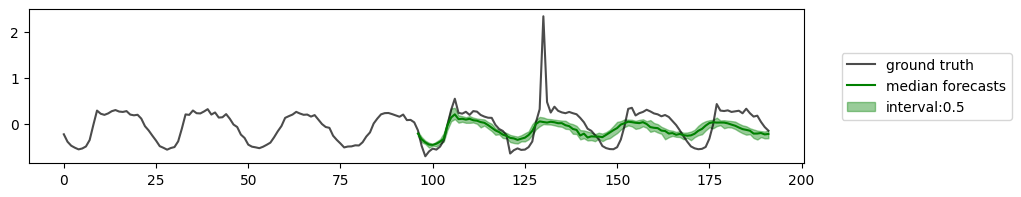

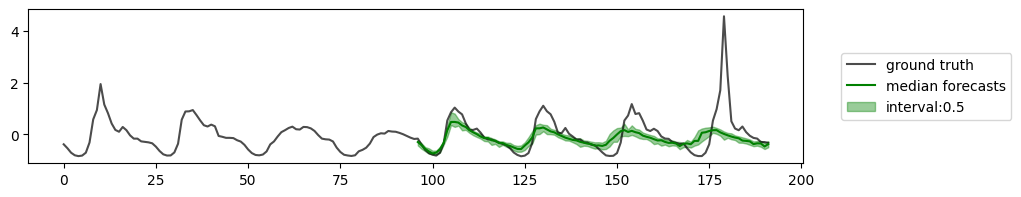

15


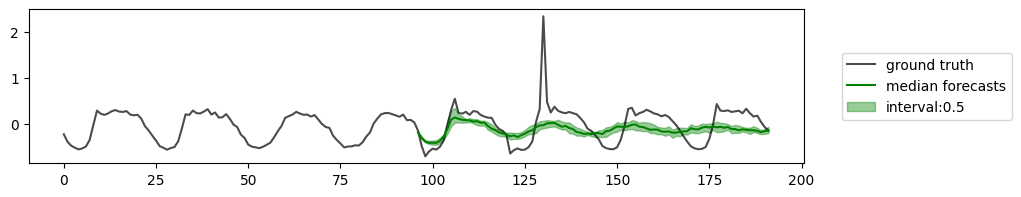

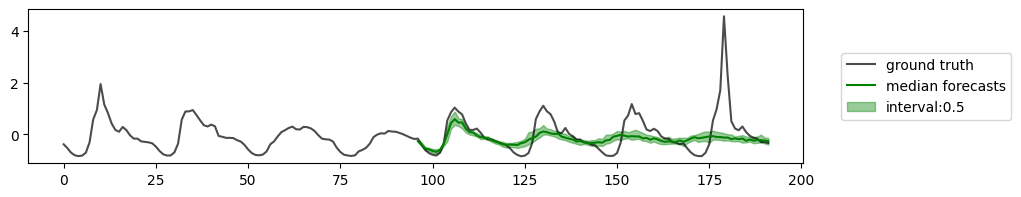

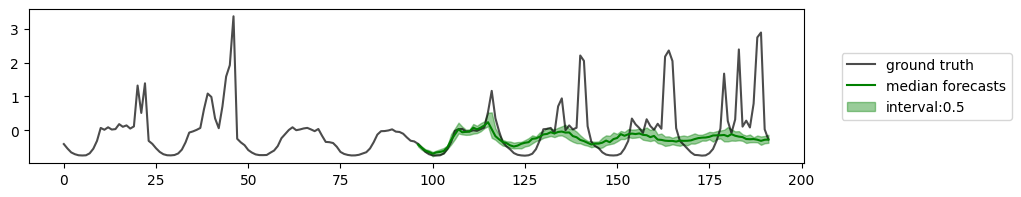

20


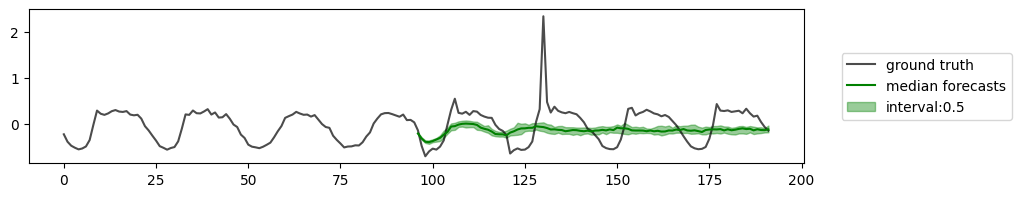

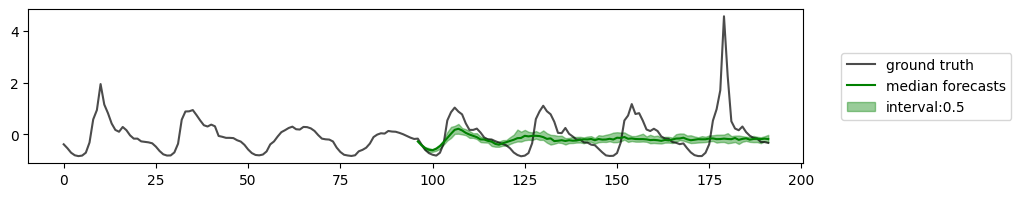

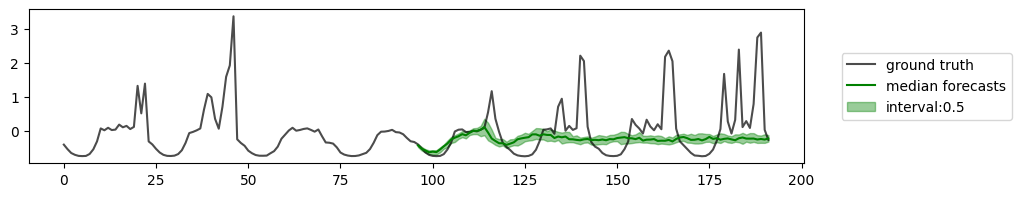

30


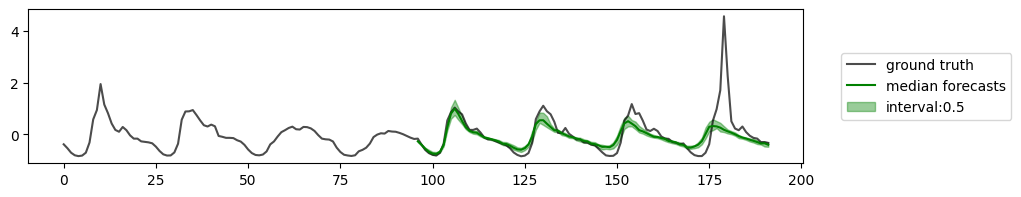

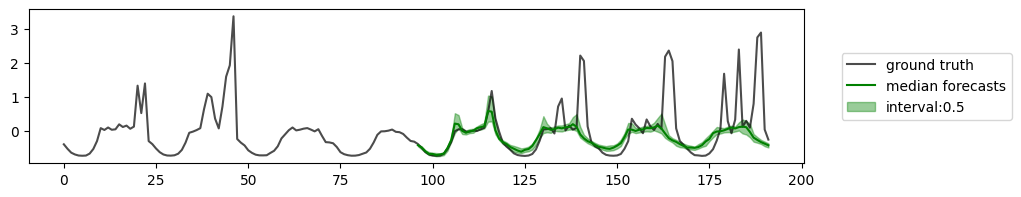

50


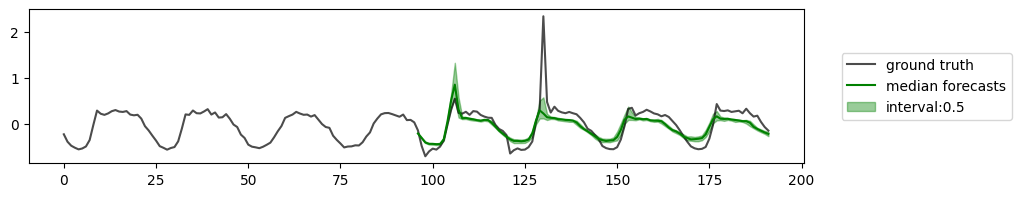

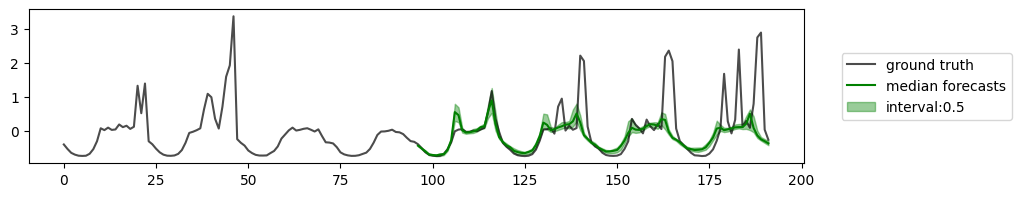

100


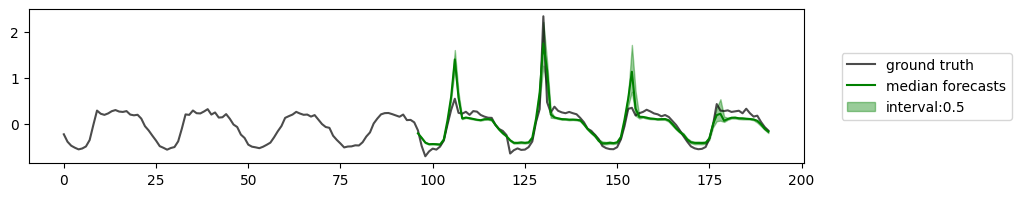

In [35]:
model = model.to('cuda')
for num_steps in steps:
    print(num_steps)
    model.forecaster.prob_model.solver_num_steps = num_steps
    forecast_and_visualize(batch, model, num_chan=[0, 1, 9], batch_idx=0, num_samples=50, context_length=96, prediction_length=96, point_type='median')
    plt.show()

### Plot results

In [38]:
import pickle
import os

metrics = {}
samplers_name = ['DDIM, linear', 'DDIM, quad', 'DPM-Solver-1', 'DPM-Solver-2', 'Euler', 'Heun']
i = 0
for file in sorted(os.listdir("samplers_res/")):
    if 'pkl' not in file:
        continue
    with open(f"samplers_res/{file}", "rb") as fp:
        metrics[samplers_name[i]] = pickle.load(fp)
    i += 1

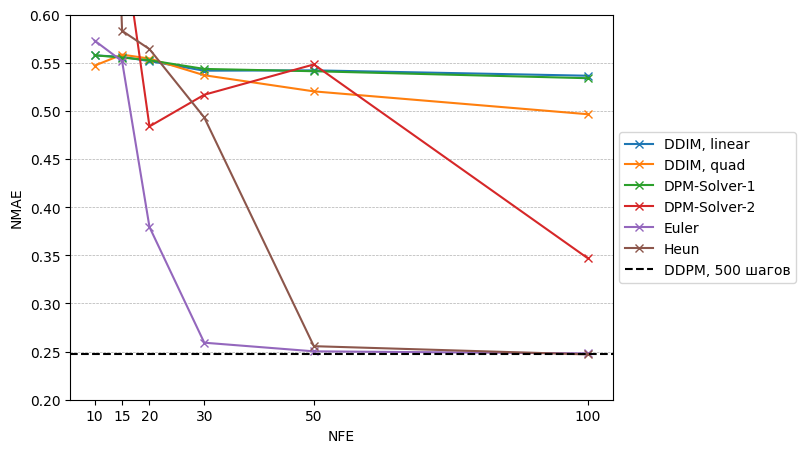

In [46]:
import matplotlib.pyplot as plt
import numpy as np

nfe = [10, 15, 20, 30, 50, 100]
plt.figure(figsize=(7, 5))

for sampler in metrics:
    runs = metrics[sampler]
    nmae = [run['96_test_ND'] for run in runs]
    plt.plot(nfe, nmae, marker='x', linestyle='-', label=sampler)
    
plt.axhline(y=0.24748101830482483 , linestyle='--', label='DDPM, 500 шагов', c='black')

plt.xlabel('NFE')
plt.xticks(nfe)
plt.ylabel('NMAE')
# plt.yticks(np.arange(0.2, 0.71, 0.05))
plt.ylim(0.2, 0.6)
plt.grid(True, which="both", ls="--", linewidth=0.5, axis='y')
# plt.grid(True, which='minor', ls="--", linewidth=0.5)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));

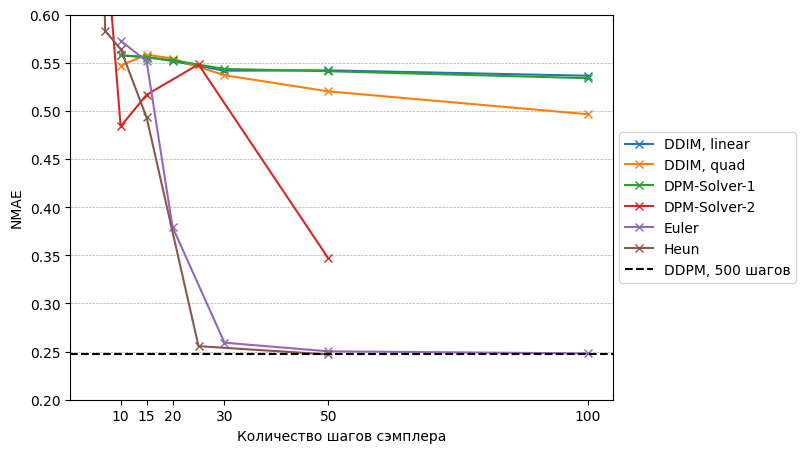

In [45]:
solver_steps = [10, 15, 20, 30, 50, 100]
solver_steps_2ord = [step // 2 for step in solver_steps]
plt.figure(figsize=(7, 5))

for sampler in metrics:
    runs = metrics[sampler]
    nmae = [run['96_test_ND'] for run in runs]
    if sampler in ['Heun', 'DPM-Solver-2']:
        plt.plot(solver_steps_2ord, nmae, marker='x', linestyle='-', label=sampler)
    else:
        plt.plot(solver_steps, nmae, marker='x', linestyle='-', label=sampler)
    
plt.axhline(y=0.24748101830482483 , linestyle='--', label='DDPM, 500 шагов', c='black')

plt.xlabel('Количество шагов сэмплера')
plt.xticks(nfe)
plt.ylabel('NMAE')
# plt.yticks(np.arange(0.1, 0.271, 0.05))
plt.ylim(0.2, 0.6)
plt.grid(True, which="both", ls="--", linewidth=0.5, axis='y')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));

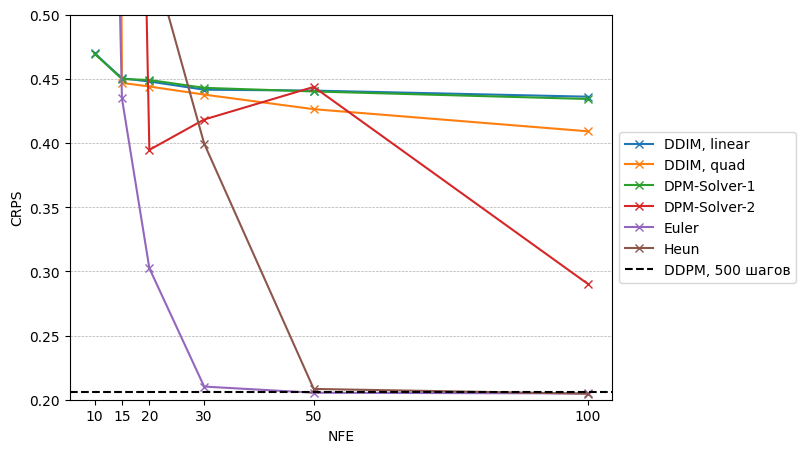

In [50]:
import matplotlib.pyplot as plt
import numpy as np

nfe = [10, 15, 20, 30, 50, 100]
plt.figure(figsize=(7, 5))

for sampler in metrics:
    runs = metrics[sampler]
    crps = [run['96_test_CRPS'] for run in runs]
    plt.plot(nfe, crps, marker='x', linestyle='-', label=sampler)

plt.axhline(y=0.20576870441436768, linestyle='--', label='DDPM, 500 шагов', c='black')

plt.xlabel('NFE')
plt.xticks(nfe)
plt.ylabel('CRPS')
plt.ylim(0.2, 0.5)
# plt.yticks(np.arange(0.1, 0.4, 0.05))
plt.grid(True, which="both", ls="--", linewidth=0.5, axis='y')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));

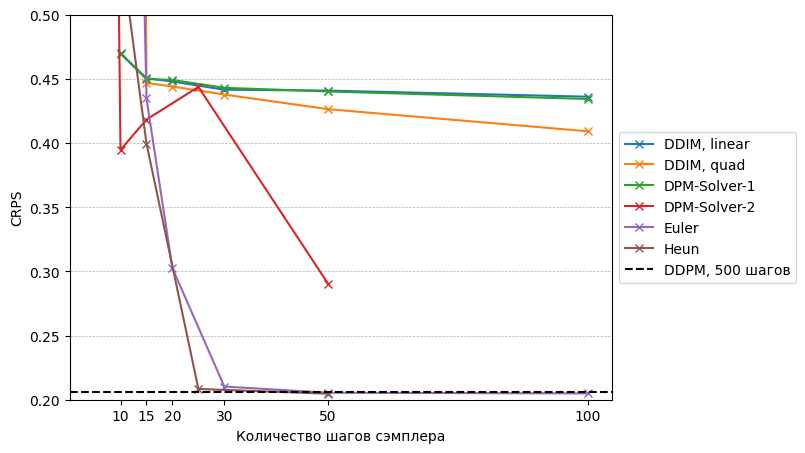

In [51]:
import matplotlib.pyplot as plt
import numpy as np

nfe = [10, 15, 20, 30, 50, 100]
plt.figure(figsize=(7, 5))

for sampler in metrics:
    runs = metrics[sampler]
    crps = [run['96_test_CRPS'] for run in runs]
    if sampler in ['Heun', 'DPM-Solver-2']:
        plt.plot(solver_steps_2ord, crps, marker='x', linestyle='-', label=sampler)
    else:
        plt.plot(solver_steps, crps, marker='x', linestyle='-', label=sampler)

plt.axhline(y=0.20576870441436768, linestyle='--', label='DDPM, 500 шагов', c='black')

plt.xlabel('Количество шагов сэмплера')
plt.xticks(nfe)
plt.ylabel('CRPS')
plt.ylim(0.2, 0.5)
plt.grid(True, which="both", ls="--", linewidth=0.5, axis='y')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));